<h1><span style="color:green"><b>Étude mondiale sur la sous-nutrition <br>pour la FAO (Food and Agriculture Organization)</b></span></h1>

<h3><span style="color:lightblue"><b>Rôle :</b></span> <b>Data Analyst</b></h3>

<h3><span style="color:lightblue"><b>Contexte du projet :</b></span></h3>

<p>En tant que Data Analyst pour la Food and Agriculture Organization (FAO), une agence de l'ONU dédiée à la lutte contre la faim dans le monde, j’ai été intégré à une équipe de chercheurs dirigée par Marc, un expert en économie de la santé. L'équipe avait pour mission de réaliser une étude approfondie sur la sous-nutrition mondiale, en se basant sur les données de l'année 2017. Le but était d’identifier les régions les plus touchées par la sous-nutrition et d’analyser les facteurs sous-jacents pour orienter les actions humanitaires et les politiques alimentaires.</p>

<h3><span style="color:lightblue"><b>Objectifs du projet :</b></span></h3>

* Analyser la proportion de personnes sous-alimentées dans le monde en 2017.

    * Calculer le nombre théorique de personnes qui pourraient être nourries en fonction de la disponibilité alimentaire mondiale et des produits végétaux.

    * Analyser l'utilisation des ressources alimentaires, notamment celles attribuées à l’alimentation animale, aux pertes et à l’alimentation humaine.

* Produire une étude détaillée pour chaque pays, mettant en lumière ceux les plus affectés par la sous-nutrition, ceux ayant bénéficiés de l'aide internationale, et ceux avec une faible disponibilité alimentaire par habitant.



<h3><span style="color:lightblue"><b>Sommaire : </b></span></h3>
- <a href="#1">1-Importation des bibliotheques et des données</a>

- <a href="#2">2- Exploration et traitement des données</a>
    - <a href="#2.1">2.1- Données sur les aides alimentaires</a>
    - <a href="#2.2">2.2- Données sur la disponibilité alimentaire</a>
    - <a href="#2.3">2.3- Données sur la population</a>
    - <a href="#2.4">2.4- Données sur la sous-nutrition</a>

- <a href="#3">3- Analyse des données<a>
    - <a href="#3.1">3.1- Analyse de la proportion de personnes sous-alimentée dans le monde en 2017</a>
        - <a href="#3.1.1">3.1.1- Calcul de la proportion de personnes en état de sous-nutrition pour 2017</a>
        - <a href="#3.1.2">3.1.2- Calcul du nombre théorique de personnes qui pouvaient être nourries en 2017</a>
        - <a href="#3.1.3">3.1.3- Utilisation de la disponibilité intérieure</a>

    - <a href="#3.2">3.2- Analyse détaillée de la sous-nutrition dans certains pays</a>
        - <a href="#3.2.1">3.2.1- Cas des pays pour lesquels la proportion de personnes sous-alimentées est la plus fortes en 2017</a>
            - <a href="#3.2.1.1">3.2.1.1- Analyse de la situation alimentaire de la Dominique</a>
            - <a href="#3.2.1.2">3.2.1.2- Analyse de la situation alimentaire de l'Haïti</a>
        - <a href="#3.2.2">3.2.2- Cas des pays qui ont le plus bénéficié d'aide depuis 2013</a>
            - <a href="#3.2.2.1">3.2.2.1- Analyse de la situation alimentaire de l'Ethiopie</a>
            - <a href="#3.2.2.2">3.2.2.2- Analyse de la situation alimentaire du Soudan</a>
        - <a href="#3.2.3">3.2.3- Cas des pays ayant le plus/moins de disponibilité par habitants</a>
            - <a href="#3.2.3.1">3.2.3.1- Analyse de la situation alimentaire de l'Autriche</a>
            - <a href="#3.2.3.2">3.2.3.2- Analyse de la situation alimentaire de la Belgique</a>

- <a href="#4">4- Analyse de certains produits</a>
    - <a href="#4.1">4.1- Etude sur les céréales</a>

<h3><a name="1"><span style="color:pink"><b>1- Importation des bibliotheques et des données</b></span></a></h3>

In [92]:
# Importation des bibliothèque
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [93]:
# Importation des données
df_aide_alimentaire = pd.read_csv("data/aide_alimentaire.csv", encoding="utf8", sep=",")
df_dispo_interieur_2017 = pd.read_csv("data/dispo_alimentaire.csv", encoding="utf8", sep=",")
df_population = pd.read_csv("data/population.csv", encoding="utf8", sep=",")
df_sous_nutrition = pd.read_csv("data/sous_nutrition.csv", encoding="utf8", sep=",")

df_info_pays = pd.read_excel("data/world_administrative_boundaries.xlsx", usecols=["French Name", "ISO 3 country code", "Continent of the territory"])
df_info_pays = df_info_pays.rename(columns={"French Name":"Pays", "ISO 3 country code":"code_pays", "Continent of the territory":"Continent"})

<h3><a name="2"><span style="color:pink"><b>2- Exploration et traitement des données</b></span></a></h3>

In [94]:
# Pour l'exploration des données, nous allons créer une fonction pour visualiser les 5 premieres lignes, 
# Les 5 dernieres lignes et 5 valeurs pris au hasard dans notre jeu données et les informations générale de notre tableau.
def exploration_data(df:pd.DataFrame, subset:list[str]=None):
    print("Apperçu des données : ")
    print("="*len("Apperçu des données :"))
    display(df.head())
    display(df.tail())
    display(df.sample(5))
    print("Information générale : ")
    print("="*len("Information générale :"))
    display(df.info())
    print("Vérification des valeurs manquantes : ")
    print("="*len("Vérification des valeurs manquantes :"))
    display(df.isnull().sum())
    print("Vérification des doublons : ")
    print("="*len("Vérification des doublons :"))
    display(df.loc[df.duplicated(subset=subset, keep=False), :])

<h4><a name="2.1"><span style="color:lightblue"><b>2.1- Données sur les aides alimentaires</b></span></a></h4>

* ##### **_Exploration_**

Le fichier aide_alimentaire contient :
* le pays bénéficiaire,
* l’année,
* le produit,
* la quantité qui a été donnée comme aide alimentaire, en tonnes.


In [95]:
exploration_data(df=df_aide_alimentaire)

Apperçu des données : 


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


,Pays bénéficiaire,Année,Produit,Valeur
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306
1474,Zimbabwe,2013,"Riz, total",64


,Pays bénéficiaire,Année,Produit,Valeur
322,Djibouti,2015,"Légumineuses Sèches,Tot.",190
123,Burkina Faso,2014,Céréales Secondaires,1032
219,"Chine, continentale",2014,Huiles végétales,0
443,Guatemala,2015,Céréales,4792
953,Pakistan,2013,Huiles végétales,7193


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


None

Vérification des valeurs manquantes : 


Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

Vérification des doublons : 


,Pays bénéficiaire,Année,Produit,Valeur


##### ***Observations :*** 
* Dans le jeu de données ```aide_alimentaire```, nous avons 1 475 lignes 4 et colonnes.
* Les types de données sont corrects et adaptés à l'analyse.
* Aucune valeur manquante n'a été détectée.
* Aucune ligne dupliquée n'a été trouvée.

##### ***Conclusion :*** 
Aucune préparation supplémentaire des données n'est nécessaire pour ce tableau.
Nous allons juste renommer la colonne ```valeur``` par ```qte_fournie``` et ```Pays_beneficiaire``` par ```Pays```.

* ##### **_Traitement des données_**

In [96]:
# Apperçu des 3 prémières lignes
df_aide_alimentaire.head(3)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224


In [97]:
# Rénommage des colonnes "Année" et "Valeur"
df_aide_alimentaire.rename(columns={"Pays bénéficiaire":"Pays", "Année":"Annee", "Valeur":"Qte_fournie"}, inplace=True)

In [98]:
df_aide_alimentaire.head(3)

,Pays,Annee,Produit,Qte_fournie
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224


<h4><a name="2.2"><span style="color:lightblue"><b>2.2- Données sur la disponibilité alimentaire</b></span></a></h4>

* ##### **_Exploration_**

Le fichier de disponibilité alimentaire pour l’année 2017 contient 18 variables :
* le pays,
* le produit,
* 4 variables de disponibilité alimentaire. Elles sont exprimées dans des unités bien spécifiques précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
* 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
* Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

In [99]:
exploration_data(df=df_dispo_interieur_2017)

Apperçu des données : 


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15604,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,4.0,0.48,0.21,0.15,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
9358,Mozambique,Haricots,vegetale,NaN,NaN,49.0,5.26,0.24,3.19,180.0,10.0,1.0,136.0,6.0,190.0,39.0,NaN,NaN
11059,Pologne,Poivre,vegetale,NaN,NaN,1.0,0.12,0.01,0.04,5.0,2.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
7682,Lesotho,Plantes Aquatiques,animale,NaN,0.0,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15482,Éthiopie,Légumineuses Autres,vegetale,NaN,NaN,96.0,10.18,0.69,6.62,1049.0,121.0,4.0,958.0,58.0,726.0,32.0,NaN,440.0
13112,Sri Lanka,"Légumes, Autres",vegetale,NaN,0.0,21.0,29.40,0.16,1.02,707.0,19.0,27.0,626.0,83.0,699.0,NaN,0.0,NaN


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en

None

Vérification des valeurs manquantes : 


Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

Vérification des doublons : 


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock


##### ***Observations :*** 
* Le jeu de données ```dispo_alimentaire```, contient 15 605  lignes et 18 colonnes.
* Les types de données sont corrects et adaptés à l'analyse.
* Des valeurs manquantes sont présentes dans toutes les colonnes, à l'exception des colonnes ```Zone```, ```Produit``` et ```Origine```.
* Aucun doublon n'a été détecté dans le jeu de données.

##### ***Conclusion :*** 
<p>Le traitement consistera à gérer les valeurs manquantes de ce jeu de données et à renommer certaines variables.</p>

* ##### **_Traitement des données_**

In [100]:
df_dispo_interieur_2017.head(2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN


In [101]:
# Nous allons commencer par renommer certaines variables pour facilité la lecture

df_dispo_interieur_2017 = df_dispo_interieur_2017.rename(columns={"Zone":"Pays", "Aliments pour animaux":"Aliment_animaux", "Autres Utilisations":"Autre_utilisations",
                                        "Disponibilité intérieure":"Dispo_interieur",
                                        "Exportations - Quantité":"Exportations",
                                        "Importations - Quantité":"Importations", "Variation de stock":"Variation_stock"})

df_dispo_interieur_2017.head()

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Dispo_interieur,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


En analysant les données, nous pouvons constater que la disponibilté interieur peut etre calculé de deux manieres :
* <p>1) Disponibilté interieur = Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement</p>
* <p>2) Disponibilté interieur = Production + Importation + Variation de stock - Exportation</p>

<p>Le traitement des valeurs manquantes de la tabe dispo_alimentaire2017 sera fait en vérifiant que les données de la table respectent ces deux bilans sur la Disponibilté intérieur. Donc en comparera la disponibilité intérieur réelle donnée dans le tableau à celle calculé avec les autres paramètres (Calcul avec formule 1 et formule 2) via une érreur relative cible fixée à 1% :</p>

$Erreur\_relative = (Disponibilite\_interieur\ réelle - Disponibilite\_interieur\ calculé) * 100 / (Disponibilite\_interieur\ calculé)$

* Si $Erreur\_relative < 1%$ : le bilan sera considéré comme vérifié et les valeurs manquantes sera remplacer par 0
* Si $Erreur\_relative > 1%$ : le bilan sera considéré comme non vérifié, nous allons donc essayer de calculer les valeurs maquantes de chacune de variables en utilisant les équations de bilans.

<p> Pour simplifier, nous allons diviser notre table dispo_alimentaire2017 en 3 : </p>

* <p>df_dispo_1 : Pour la première formule</p>
* <p>df_dispo_2 : Pour la seconde formule</p>
* <p>df_nrj_necessaire : qui contient les différentes énergies</p>

<h5><b>Traitement df_dispo_1</b></h5>

In [102]:
df_dispo_1 = df_dispo_interieur_2017[df_dispo_interieur_2017.columns[[0, 1, 2, 9, 10, 11, 14, 17]]]
df_dispo_1.head()

,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
0,Afghanistan,Abats Comestible,animale,53.0,NaN,NaN,53.0,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,2.0,40.0,3.0,NaN
2,Afghanistan,Aliments pour enfants,vegetale,2.0,NaN,2.0,NaN,NaN
3,Afghanistan,Ananas,vegetale,0.0,NaN,0.0,NaN,NaN
4,Afghanistan,Bananes,vegetale,82.0,NaN,82.0,NaN,NaN


In [103]:
exploration_data(df=df_dispo_1)

Apperçu des données : 


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
0,Afghanistan,Abats Comestible,animale,53.0,NaN,NaN,53.0,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,2.0,40.0,3.0,NaN
2,Afghanistan,Aliments pour enfants,vegetale,2.0,NaN,2.0,NaN,NaN
3,Afghanistan,Ananas,vegetale,0.0,NaN,0.0,NaN,NaN
4,Afghanistan,Bananes,vegetale,82.0,NaN,82.0,NaN,NaN


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
15600,Îles Salomon,Viande de Suides,animale,3.0,NaN,0.0,2.0,NaN
15601,Îles Salomon,Viande de Volailles,animale,2.0,NaN,2.0,0.0,NaN
15602,Îles Salomon,"Viande, Autre",animale,0.0,NaN,0.0,NaN,NaN
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,NaN,NaN
15604,Îles Salomon,"Épices, Autres",vegetale,0.0,0.0,0.0,0.0,NaN


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
8492,Malawi,Poissons Pelagiques,animale,1.0,0.0,1.0,NaN,0.0
2669,Cambodge,Miscellanees,vegetale,NaN,NaN,NaN,NaN,NaN
4502,Estonie,Huile d'Arachide,vegetale,0.0,0.0,0.0,NaN,NaN
1856,Bosnie-Herzégovine,Olives,vegetale,1.0,NaN,0.0,0.0,NaN
2299,Burkina Faso,Huile d'Olive,vegetale,0.0,NaN,0.0,NaN,NaN


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pays             15605 non-null  object 
 1   Produit          15605 non-null  object 
 2   Origine          15605 non-null  object 
 3   Dispo_interieur  15382 non-null  float64
 4   Exportations     12226 non-null  float64
 5   Importations     14852 non-null  float64
 6   Production       9180 non-null   float64
 7   Variation_stock  6776 non-null   float64
dtypes: float64(5), object(3)
memory usage: 975.4+ KB


None

Vérification des valeurs manquantes : 


Pays                  0
Produit               0
Origine               0
Dispo_interieur     223
Exportations       3379
Importations        753
Production         6425
Variation_stock    8829
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock


In [104]:
# fonction du calcul de l'erreur relative

def erreur_relative(val_reel: float, val_calcule: float):
    erreur = round((val_reel - val_calcule) * 100 / val_calcule, 3)
    return erreur
    

In [105]:
df_bilan = df_dispo_1.loc[:, ~df_dispo_1.columns.isin(["Pays", "Produit", "Origine"])].sum(axis=0)
df_bilan

Dispo_interieur     9848994.0
Exportations        1352158.0
Importations        1296053.0
Production         10009680.0
Variation_stock     -104402.0
dtype: float64

#### ***Vérification du Bilan***

<p>Disponibilté interieur = Production + Importation + Variation de stock - Exportation</p>

In [106]:
bilan_reel = df_bilan["Dispo_interieur"]
bilan_calcule = df_bilan["Importations"] + df_bilan["Production"] + df_bilan["Variation_stock"] - df_bilan["Exportations"]

erreur = erreur_relative(val_reel=bilan_reel, val_calcule=bilan_calcule)
print(f"L'erreur relative est de {erreur} %")

L'erreur relative est de -0.002 %


Nous pouvons donc considérer que le bilan est respecté à 0.002 %. Nous allons donc remplacer les valeurs manquantes par 0

In [107]:
df_dispo_1 = df_dispo_1.fillna(0)

In [108]:
exploration_data(df=df_dispo_1)

Apperçu des données : 


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
0,Afghanistan,Abats Comestible,animale,53.0,0.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,2.0,40.0,3.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,2.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,82.0,0.0,82.0,0.0,0.0


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
15600,Îles Salomon,Viande de Suides,animale,3.0,0.0,0.0,2.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,2.0,0.0,2.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.0,0.0
15604,Îles Salomon,"Épices, Autres",vegetale,0.0,0.0,0.0,0.0,0.0


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
13081,Sri Lanka,Citrons & Limes,vegetale,5.0,0.0,0.0,6.0,0.0
10857,Pays-Bas,Orge,vegetale,1866.0,500.0,2139.0,208.0,18.0
5054,Gabon,Graines Colza/Moutarde,vegetale,1.0,0.0,1.0,0.0,0.0
14751,Viet Nam,Olives,vegetale,0.0,0.0,0.0,0.0,0.0
7838,Liban,Huile de Tournesol,vegetale,47.0,6.0,67.0,1.0,-15.0


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pays             15605 non-null  object 
 1   Produit          15605 non-null  object 
 2   Origine          15605 non-null  object 
 3   Dispo_interieur  15605 non-null  float64
 4   Exportations     15605 non-null  float64
 5   Importations     15605 non-null  float64
 6   Production       15605 non-null  float64
 7   Variation_stock  15605 non-null  float64
dtypes: float64(5), object(3)
memory usage: 975.4+ KB


None

Vérification des valeurs manquantes : 


Pays               0
Produit            0
Origine            0
Dispo_interieur    0
Exportations       0
Importations       0
Production         0
Variation_stock    0
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock


df_dispo_1 est pret à etre utilisé

<h5><b>Traitement df_dispo_2</b></h5>

In [109]:
df_dispo_interieur_2017.head(1)

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Dispo_interieur,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.2,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN


In [110]:
df_dispo_2 = df_dispo_interieur_2017[df_dispo_interieur_2017.columns[[0, 1, 2, 3, 4, 9, 12, 13, 15, 16]]]
df_dispo_2.head()

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
0,Afghanistan,Abats Comestible,animale,NaN,NaN,53.0,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,41.0,39.0,2.0,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,2.0,2.0,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,82.0,82.0,NaN,NaN,NaN


In [111]:
exploration_data(df=df_dispo_2)

Apperçu des données : 


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
0,Afghanistan,Abats Comestible,animale,NaN,NaN,53.0,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,41.0,39.0,2.0,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,2.0,2.0,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,82.0,82.0,NaN,NaN,NaN


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,3.0,3.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,2.0,2.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.0,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.0,NaN,NaN,NaN
15604,Îles Salomon,"Épices, Autres",vegetale,NaN,NaN,0.0,0.0,NaN,NaN,NaN


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
537,Antigua-et-Barbuda,Edulcorants Autres,vegetale,NaN,1.0,1.0,0.0,NaN,NaN,NaN
5719,Guinée-Bissau,Riz (Eq Blanchi),vegetale,3.0,NaN,183.0,167.0,7.0,6.0,NaN
15079,Égypte,Crème,animale,NaN,NaN,4.0,4.0,NaN,NaN,NaN
1257,Bangladesh,Aliments pour enfants,vegetale,NaN,NaN,5.0,5.0,NaN,NaN,NaN
6048,Honduras,Légumineuses Autres,vegetale,NaN,NaN,0.0,0.0,NaN,NaN,NaN


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pays                15605 non-null  object 
 1   Produit             15605 non-null  object 
 2   Origine             15605 non-null  object 
 3   Aliment_animaux     2720 non-null   float64
 4   Autre_utilisations  5496 non-null   float64
 5   Dispo_interieur     15382 non-null  float64
 6   Nourriture          14015 non-null  float64
 7   Pertes              4278 non-null   float64
 8   Semences            2091 non-null   float64
 9   Traitement          2292 non-null   float64
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


None

Vérification des valeurs manquantes : 


Pays                      0
Produit                   0
Origine                   0
Aliment_animaux       12885
Autre_utilisations    10109
Dispo_interieur         223
Nourriture             1590
Pertes                11327
Semences              13514
Traitement            13313
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement


#### ***Vérification du Bilan***

In [112]:
df_bilan_2 = df_dispo_2.loc[:, ~df_dispo_2.columns.isin(["Pays", "Produit", "Origine"])].sum(axis=0)
df_bilan_2

Aliment_animaux       1304245.0
Autre_utilisations     865023.0
Dispo_interieur       9848994.0
Nourriture            4876258.0
Pertes                 453698.0
Semences               154681.0
Traitement            2204687.0
dtype: float64

<p>Disponibilté interieur = Aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement</p>

In [113]:
bilan_reel_2 =  df_bilan_2["Dispo_interieur"]
bilan_calcule_2 = df_bilan_2.sum() - df_bilan_2["Dispo_interieur"]
bilan_calcule_2

np.float64(9858592.0)

In [114]:
erreur_2 = erreur_relative(val_reel=bilan_reel_2, val_calcule=bilan_calcule_2)
print(f"L'erreur relative est de {erreur_2} %")

L'erreur relative est de -0.097 %


Nous pouvons donc considérer que le bilan est respecté à 0.097 %. Nous allons donc remplacer les valeurs manquantes par 0

In [115]:
df_dispo_2 = df_dispo_2.fillna(0)
exploration_data(df=df_dispo_2)

Apperçu des données : 


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,39.0,2.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,2.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,82.0,0.0,0.0,0.0


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,3.0,3.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,2.0,2.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15604,Îles Salomon,"Épices, Autres",vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
2401,Bélarus,"Légumes, Autres",vegetale,163.0,0.0,1310.0,1059.0,88.0,0.0,0.0
6049,Honduras,Manioc,vegetale,0.0,0.0,23.0,22.0,1.0,0.0,0.0
3822,Croatie,Soja,vegetale,3.0,0.0,97.0,0.0,5.0,2.0,87.0
11482,Royaume-Uni,Huil Plantes Oleif Autr,vegetale,0.0,66.0,83.0,16.0,0.0,0.0,0.0
9904,Norvège,Graisses Animales Crue,animale,0.0,9.0,38.0,25.0,0.0,0.0,4.0


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pays                15605 non-null  object 
 1   Produit             15605 non-null  object 
 2   Origine             15605 non-null  object 
 3   Aliment_animaux     15605 non-null  float64
 4   Autre_utilisations  15605 non-null  float64
 5   Dispo_interieur     15605 non-null  float64
 6   Nourriture          15605 non-null  float64
 7   Pertes              15605 non-null  float64
 8   Semences            15605 non-null  float64
 9   Traitement          15605 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.2+ MB


None

Vérification des valeurs manquantes : 


Pays                  0
Produit               0
Origine               0
Aliment_animaux       0
Autre_utilisations    0
Dispo_interieur       0
Nourriture            0
Pertes                0
Semences              0
Traitement            0
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement


La table dispo_2 est prêt à être utilisé. Pas de valeurs manquantes, pas de doublons, les types sont correctes

##### ***Traitement de la table df_nrj_necessaire***

In [116]:
df_dispo_interieur_2017.head(2)

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Dispo_interieur,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation_stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN


In [117]:
df_nrj_necessaire = df_dispo_interieur_2017[["Pays", "Produit", "Origine", "Disponibilité alimentaire (Kcal/personne/jour)"]]
df_nrj_necessaire.head(2)

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,animale,5.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0


In [118]:
exploration_data(df=df_nrj_necessaire)

Apperçu des données : 


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,animale,5.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0
3,Afghanistan,Ananas,vegetale,0.0
4,Afghanistan,Bananes,vegetale,4.0


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
15600,Îles Salomon,Viande de Suides,animale,45.0
15601,Îles Salomon,Viande de Volailles,animale,11.0
15602,Îles Salomon,"Viande, Autre",animale,0.0
15603,Îles Salomon,Vin,vegetale,0.0
15604,Îles Salomon,"Épices, Autres",vegetale,4.0


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
11919,République dominicaine,Coco (Incl Coprah),vegetale,53.0
14824,Yémen,Huile de Tournesol,vegetale,5.0
6,Afghanistan,Bière,vegetale,0.0
12665,Serbie,"Légumes, Autres",vegetale,50.0
10154,Népal,Ananas,vegetale,1.0


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            15605 non-null  object 
 1   Produit                                         15605 non-null  object 
 2   Origine                                         15605 non-null  object 
 3   Disponibilité alimentaire (Kcal/personne/jour)  14241 non-null  float64
dtypes: float64(1), object(3)
memory usage: 487.8+ KB


None

Vérification des valeurs manquantes : 


Pays                                                 0
Produit                                              0
Origine                                              0
Disponibilité alimentaire (Kcal/personne/jour)    1364
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)


Nous avons des valeurs manquantes de la df_nrj_necessaire, cette variable sera utile pour notre analyse. Nous allons donc supprimer les lignes pour laquelle les Disponibilité alimentaire ne sont pas renseignées.

In [119]:
df_nrj_necessaire = df_nrj_necessaire.dropna(axis=0).reset_index(drop=True)
exploration_data(df=df_nrj_necessaire)

Apperçu des données : 


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,animale,5.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0
3,Afghanistan,Ananas,vegetale,0.0
4,Afghanistan,Bananes,vegetale,4.0


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
14236,Îles Salomon,Viande de Suides,animale,45.0
14237,Îles Salomon,Viande de Volailles,animale,11.0
14238,Îles Salomon,"Viande, Autre",animale,0.0
14239,Îles Salomon,Vin,vegetale,0.0
14240,Îles Salomon,"Épices, Autres",vegetale,4.0


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
469,Antigua-et-Barbuda,Avoine,vegetale,15.0
14106,Éthiopie,Graisses Animales Crue,animale,6.0
8024,Maroc,"Céréales, Autres",vegetale,0.0
1126,Bahamas,Viande de Bovins,animale,77.0
4485,France,Pois,vegetale,4.0


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14241 entries, 0 to 14240
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Pays                                            14241 non-null  object 
 1   Produit                                         14241 non-null  object 
 2   Origine                                         14241 non-null  object 
 3   Disponibilité alimentaire (Kcal/personne/jour)  14241 non-null  float64
dtypes: float64(1), object(3)
memory usage: 445.2+ KB


None

Vérification des valeurs manquantes : 


Pays                                              0
Produit                                           0
Origine                                           0
Disponibilité alimentaire (Kcal/personne/jour)    0
dtype: int64

Vérification des doublons : 


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)


Table prets à etre utilisé.

<h4><a name="2.3"><span style="color:lightblue"><b>2.3- Données sur la population</b></span></a></h4>

* ##### **_Exploration_**

Le fichier de la population inclut :
* Le pays.
* L’année.
* La population du pays, exprimée en milliers d’habitants

In [120]:
exploration_data(df=df_population)

Apperçu des données : 


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


,Zone,Année,Valeur
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595
1415,Zimbabwe,2018,14438.802


,Zone,Année,Valeur
508,Guinée-Bissau,2017,1828.145
783,Malawi,2016,17205.261
434,Gambie,2015,2085.860
46,Anguilla,2017,14.584
567,Îles Falkland (Malvinas),2016,2.928


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


None

Vérification des valeurs manquantes : 


Zone      0
Année     0
Valeur    0
dtype: int64

Vérification des doublons : 


,Zone,Année,Valeur


##### ***Observations :*** 
* Dans le jeu de données ```population```, nous avons 1416 lignes et 3 colonnes.
* Les types de données sont corrects et adaptés à l'analyse.
* Aucune valeur manquante n'a été détectée.
* Aucune ligne dupliquée n'a été trouvée.

##### ***Conclusion :*** 
Aucune préparation supplémentaire des données n'est nécessaire pour ce tableau. Toutefois, nous allons tout de même renommer la colonne ```valeur``` par ```population``` pour eviter toute ambiguïté.

* ##### **_Traitement des données_**

In [121]:
# Apperçu des 3 premières lignes
df_population.head(3)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603


In [122]:
# Rénommage des colonnes
df_population = df_population.rename(columns={"Zone":"Pays", "Valeur":"Population", "Année":"Annee"})
# En multipli par 1000 pour avoir la population en Hbts
df_population["Population"] = df_population["Population"]*1000

In [123]:
df_population.head(3)

,Pays,Annee,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0


<h4><a name="2.4"><span style="color:lightblue"><b>2.4- Données sur la sous-nutrition</b></span></a></h4>

* ##### **_Exploration_**

Le fichier d’insécurité alimentaire, inclut :
* Le pays.
* Intervalle d’années.
* Le nombre de personnes en sous-alimentation en millions d’habitants
(ex. : pour l’intervalle 2012-2014, le nombre de personnes correspond à la
moyenne sur ces 3 années, on peut le résumer en 2013).

In [124]:
exploration_data(df=df_sous_nutrition)

Apperçu des données : 


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


,Zone,Année,Valeur
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN
1217,Zimbabwe,2017-2019,NaN


,Zone,Année,Valeur
575,Kazakhstan,2017-2019,NaN
546,Italie,2012-2014,NaN
260,Comores,2014-2016,NaN
236,"Chine, continentale",2014-2016,NaN
434,Groenland,2014-2016,NaN


Information générale : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


None

Vérification des valeurs manquantes : 


Zone        0
Année       0
Valeur    594
dtype: int64

Vérification des doublons : 


,Zone,Année,Valeur


##### ***Observations :*** 
* Le jeu de données ```sous_nutrition```, contient 1 218 lignes et 3 colonnes.
* Les types de données ne sont pas entièrement corrects car la colonne "valeur", qui devrait être numérique, contient des entrées telles que ```<0.1```, ce qui empêche sa conversion automatique.
* Des valeurs manquantes sont présentes dans la colonne ```valeur```.
* Aucun doublon n'a été identifié dans le jeu de données.

##### ***Conclusion :*** 
Nous allons traiter les valeurs manquantes de la colonne ```valeur```, puis convertir la colonne en variable numérique, et la renommer en ```nb_personnes```. Etant donnée que cette colonne est essentielle à notre analyse, les lignes comportant des valeurs manquantes seront supprimées.
 
La colonne ```Année``` sera également modifiée pour remplacer les intervalles de temps par leur moyenne. Par exemple, l'intervalle 2012-2014 sera résumé à 2013, représentant la moyenne des personnes sur ces trois années.

* ##### **_Traitement des données_**

In [125]:
df_sous_nutrition.head(3)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9


In [126]:
# Rénommage des colonnes
df_sous_nutrition.rename(columns={"Zone":"Pays", "Année":"Annee", "Valeur":"Nb_personnes"}, inplace=True)
# Apperçu des 5 premières lignes
df_sous_nutrition.head()

,Pays,Annee,Nb_personnes
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [127]:
# Nous allons remplacer les intervalles de temps par leur moyenne.
# Par exemple, l'intervalle 2012-2014 sera résumé à 2013, représentant la moyenne des personnes sur ces trois années.

# On affiche les valeurs des intervalles de temps
display(df_sous_nutrition["Annee"].unique())

# On crée une fonction pour remplacer les intervalle de temps par leur moyenne
def intervalle_to_mean_time(interval_time : str = "2002-2004"):
    try :
        # on crée une liste à partir de caractère "-"
        interval_time_list_str = interval_time.split("-")
        # On converti les valeurs de cette liste en entier
        interval_time_list_int = []
        for value in interval_time_list_str :
            interval_time_list_int.append(int(value))

        # On sauvegarde et renvoie la moyenne des deux nombres
        result = int(np.mean(interval_time_list_int))
    except ValueError :
        # On affiche le message suivant en cas d'erreur
        print(f"Error : {interval_time} n'est pas une valeur correcte.")
        result = 0
    return result

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [128]:
# On applique la fonction à la colonne "Annee"
df_sous_nutrition["Annee"] = df_sous_nutrition["Annee"].apply(lambda x : intervalle_to_mean_time(x))
df_sous_nutrition.head(3)

,Pays,Annee,Nb_personnes
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9


In [129]:
# On affiche les valeurs comportant le caractère '<0.1'
display(df_sous_nutrition.loc[(df_sous_nutrition["Nb_personnes"] == "<0.1") & (df_sous_nutrition["Annee"] == 2017), :].head(3))
display(len(df_sous_nutrition.loc[(df_sous_nutrition["Nb_personnes"] == "<0.1") & (df_sous_nutrition["Annee"] == 2017), :]))

,Pays,Annee,Nb_personnes
64,Arménie,2017,<0.1
106,Barbade,2017,<0.1
124,Belize,2017,<0.1


20

<p>Dans notre jeu de donnée, pour l'année 2017, nous avons 20 pays qui n'ont pas des informations exactes sur le nombres de personnes en sous-nutrition. Nous avons donc plusieurs choix. Nous pouvons remplacer le caractère "<0.1" par une valeur nulle, par "0.1" ou une valeur inférieur à 0.1. Nous pouvons aussi chercher ces informations une par une sur dans la bibliographie afin de remplacer ces caractères par leur valeur exacte. </p>

<p>Pour simplifier, nous allons choisir de remplacer ces valeur par 0.05 qui est la mediane des valeurs comprises entre 0 et 0.1</p>

In [130]:
df_sous_nutrition.loc[df_sous_nutrition["Nb_personnes"] == "<0.1", "Nb_personnes"] = "0.05"

In [131]:
df_sous_nutrition.isna().sum()

Pays              0
Annee             0
Nb_personnes    594
dtype: int64

In [132]:
# Traitement des valeurs manquantes
df_sous_nutrition.loc[df_sous_nutrition["Nb_personnes"].isna(), :].head()

,Pays,Annee,Nb_personnes
24,Allemagne,2013,NaN
25,Allemagne,2014,NaN
26,Allemagne,2015,NaN
27,Allemagne,2016,NaN
28,Allemagne,2017,NaN


In [133]:
# On supprime les lignes de la colonne "Nb_personnes" et on réinitialise les index
df_sous_nutrition = df_sous_nutrition.dropna(subset="Nb_personnes").reset_index(drop=True)
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pays          624 non-null    object
 1   Annee         624 non-null    int64 
 2   Nb_personnes  624 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.8+ KB


In [134]:
df_sous_nutrition.head()

,Pays,Annee,Nb_personnes
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


In [135]:
# Nous pouvons maintenant passer d'une variable "object" à "numerique" pour notre variable "Nb_personnes"
df_sous_nutrition["Nb_personnes"] = pd.to_numeric(df_sous_nutrition["Nb_personnes"], errors="coerce")
df_sous_nutrition["Nb_personnes"] = df_sous_nutrition["Nb_personnes"]*1000000
df_sous_nutrition.head()

,Pays,Annee,Nb_personnes
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [136]:
df_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pays          624 non-null    object 
 1   Annee         624 non-null    int64  
 2   Nb_personnes  624 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.8+ KB


<h3><a name="3"><span style="color:pink"><b>3- Analyse des données</b></span></a></h3>

<h4><a name="3.1"><span style="color:lightblue"><b>3.1- Analyse de la proportion de personnes sous-alimentée dans le monde en 2017</b></span></a></h4>

Pour cette analyse, nous allons :

* <p>Calculer le nombre théorique de personnes qui pourraient être nourries en fonction de la disponibilité alimentaire mondiale et des produits végétaux.</p>
* <p>Analyser l'utilisation des ressources alimentaires, notamment celles attribuées à l’alimentation animale, aux pertes et à l’alimentation humaine.</p>


<h5><a name="3.1.1"><span style="color:blue"><b>3.1.1- Calcul de la proportion de personnes en état de sous-nutrition pour 2017</b></span></a></h5>


$Taux\ de\ sous\ nutrition = \frac{Nombre\ personnes\ sous\ alimente}{Population\ mondiale\ en\ 2017} \cdot 100$



In [137]:
display(df_sous_nutrition.head())
display(df_population.head())

,Pays,Annee,Nb_personnes
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


,Pays,Annee,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [138]:
# On calcul la somme des personnes en état de sous-nutrtion dans le monde en 2017
nb_sous_nutrition_2017 = df_sous_nutrition.loc[df_sous_nutrition["Annee"] == 2017, "Nb_personnes"].sum()
# On calcul la population mondiale en 2017
population_mondial_2017 = df_population.loc[df_population["Annee"] == 2017, "Population"].sum()

# On calcul le taux de personne en état de sous-nutrition dans le monde en 2017
taux_sous_nutrition_2017 = round(nb_sous_nutrition_2017*100/population_mondial_2017, 1)

print(f"En 2017, la proportion mondiale des personnes en état sous nutrition était de {taux_sous_nutrition_2017} %")

En 2017, la proportion mondiale des personnes en état sous nutrition était de 7.1 %


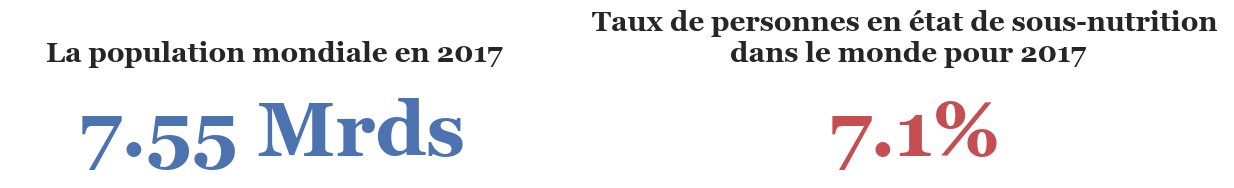

In [139]:
font1 = {"size":20, "fontname":"Georgia", "fontweight":"bold"}
font2 = {"size":55, "c":"b", "fontname":"Georgia", "fontweight":"bold"}
font3 = {"size":55, "c":"r", "fontname":"Georgia", "fontweight":"bold"}


sns.set_style("darkgrid")
sns.set_theme("notebook")
fig = plt.figure(figsize=(15,1), dpi=100, facecolor="white")
ax1 = fig.add_subplot(121)
ax1.set_facecolor(color="white")
ax1.text(0.13, 0.3, f"{population_mondial_2017/1000000000:.2f} Mrds", fontdict=font2)
ax1.set_axis_off()
ax1.set_title("La population mondiale en 2017\n", fontdict=font1)

ax2 = fig.add_subplot(122)
ax2.set_facecolor(color="white")
ax2.text(0.35, 0.3, f"{taux_sous_nutrition_2017}%", fontdict=font3)
ax2.set_axis_off()
ax2.set_title("Taux de personnes en état de sous-nutrition \ndans le monde pour 2017\n", fontdict=font1)
plt.show()

<h5><a name="3.1.2"><span style="color:blue"><b>3.1.2- Calcul du nombre théorique de personnes qui pouvaient être nourries en 2017</b></span></a></h5>

Le nombre de personnes qui pouvaient etre nourri sera calculer à partir de la disponibilité alimentaire donc la table df_nrj_necessaire et de la table population.

$Nombre\ de\ personne =  \frac{Energie\ alimentaire\ mondiale\ en\ (Kcal/jour)}{Energie\ alimentaire\ pour\ une\ personne\ (Kcal/jour/personne)}$

In [140]:
df_nrj_necessaire.head()

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,Abats Comestible,animale,5.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0
3,Afghanistan,Ananas,vegetale,0.0
4,Afghanistan,Bananes,vegetale,4.0


In [141]:
df_population.head(2)

,Pays,Annee,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0


In [142]:
# On ajoute la population à la table dispo_alim2017
df_nrj_necessaire = pd.merge(df_nrj_necessaire, df_population.loc[df_population["Annee"]==2017, ["Pays", "Population"]], how="left", on=["Pays"])
df_nrj_necessaire.head()

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0


In [143]:
# On calcule la disponibilté alimentaire en (Kcal/jour) par pays, produit et origine.
df_nrj_necessaire["Disponibilité alimentaire (Kcal/jour)"] = df_nrj_necessaire["Disponibilité alimentaire (Kcal/personne/jour)"]*df_nrj_necessaire["Population"]
df_nrj_necessaire.head()

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,145184452.0


In [144]:
# On calcule l'énergie alimentaire mondiale pour l'année 2017
energie_alim_mondiale_dispo_2017 = df_nrj_necessaire["Disponibilité alimentaire (Kcal/jour)"].sum()

<p>Nous avons l'energie alimentaire disponible dans le monde pour l'année 2017. D'après la bibliographie, le besoin calorifique quotidien moyen dépend de plusieurs facteurs tels que l'âge, le métabolisme et la composition corporelle. Cépendant, les estimatimations générales sont les suivantes :</p>

* <b>Femmes :</b>
    * Peu active : 1 800 à 2 000 kcal/jour
    * Modérément active : 2 000 à 2 200 kcal/jour
    * Très active : 2 200 à 2 400 kcal/jour

* <b>Hommes :</b>
    * Peu actif : 2 200 à 2 400 kcal/jour
    * Modérément actif : 2 400 à 2 800 kcal/jour
    * Très actif : 2 800 à 3 000 kcal/jour  

<p>Pour notre étude, nous allons considérer un besoin calorique quotidien moyen pour une personne à 2100 Kcal/jour
qui correspond à la moyenne des moyennes d'un homme et d'une femme peu actif.</p>

<p>(((1800 + 2000)/2) + ((2200 + 2400)/2))/2 = 2100 Kcal/personne/jour</p>

<p>Nous allons donc diviser l'energie alimentaire mondiale disponible par l'énergie calorique moyenne pour une personne.</p>

In [145]:
# Kcal/pers/jour

energie_alim_necessaire = 2100

# Le nombre de personne qu'on pourrait nourrire avec cette energie mondiale est de : 
nb_personnes = energie_alim_mondiale_dispo_2017 / energie_alim_necessaire

# Le nombre de personne qu'on pourrait nourrire uniquement qu'avec des produits d'origine animale est de : 
energie_alim_mondiale_dispo_2017_animale = df_nrj_necessaire.loc[df_nrj_necessaire["Origine"] == "animale", "Disponibilité alimentaire (Kcal/jour)"].sum()
nb_personnes_animale = energie_alim_mondiale_dispo_2017_animale / energie_alim_necessaire

# # Le nombre de personne qu'on pourrait nourrire uniquement qu'avec des produits d'origine végétale est de : 
energie_alim_mondiale_dispo_2017_vegetale = df_nrj_necessaire.loc[df_nrj_necessaire["Origine"] == "vegetale", "Disponibilité alimentaire (Kcal/jour)"].sum()
nb_personnes_vegetale = energie_alim_mondiale_dispo_2017_vegetale / energie_alim_necessaire

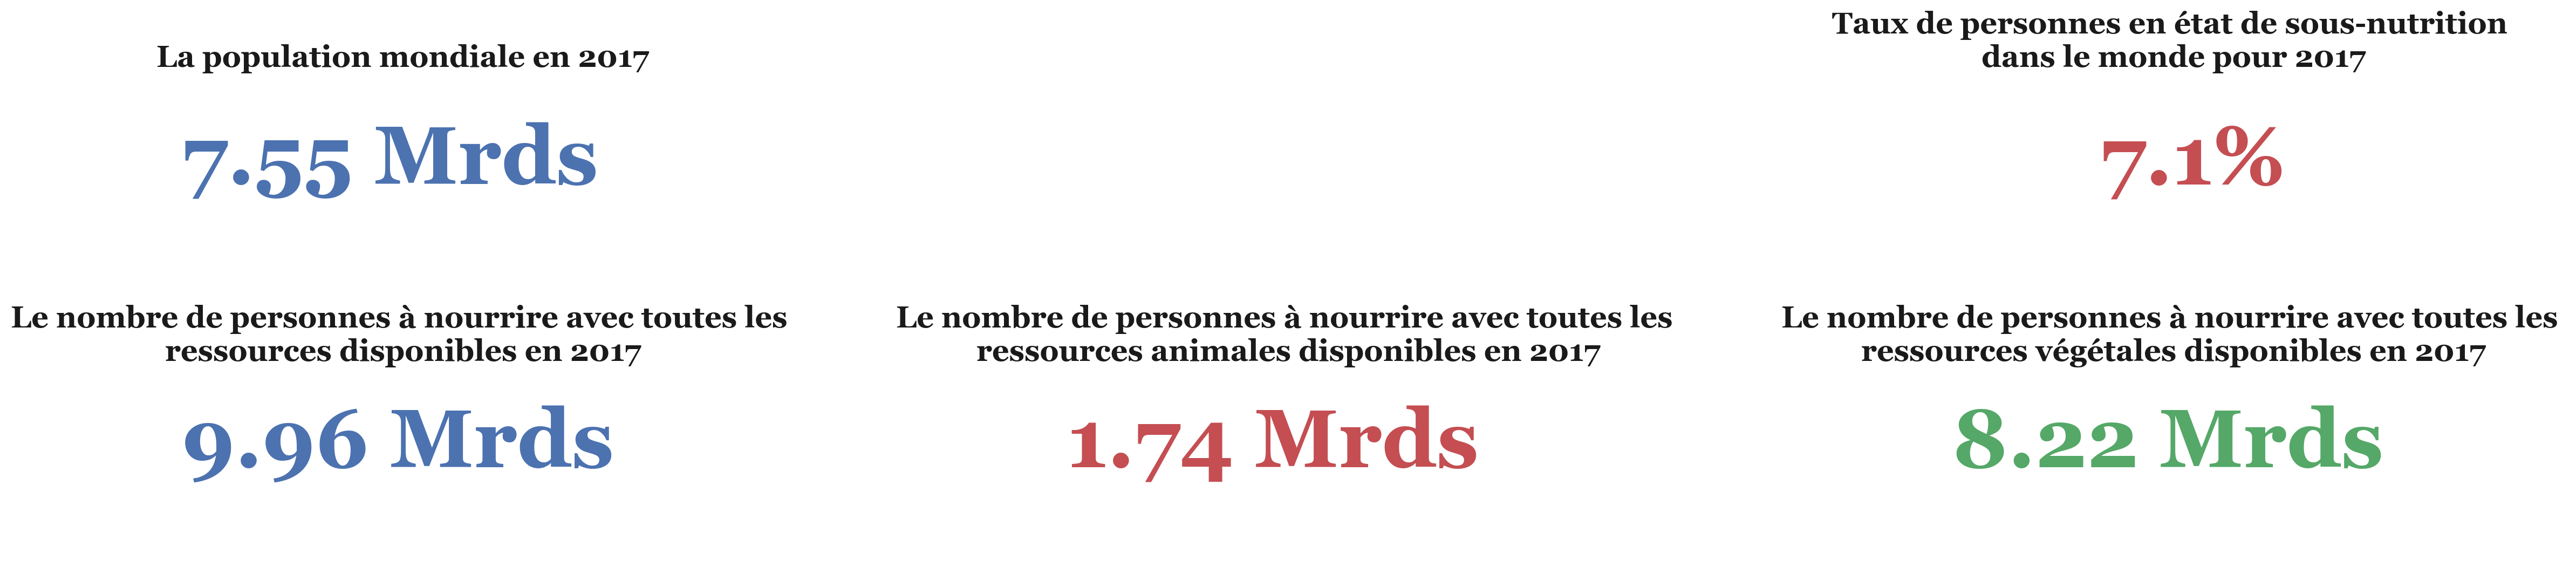

In [146]:
sns.set_style("darkgrid")
sns.set_theme("notebook")
fig = plt.figure(figsize=(30,5), dpi=200, facecolor="white")
ax1 = fig.add_subplot(231)
ax1.set_facecolor(color="white")
ax1.text(0.2, 0.3, f"{population_mondial_2017/1000000000:.2f} Mrds\n", size=55, c="b", fontname="Georgia", fontweight="bold")
ax1.set_axis_off()
ax1.set_title("La population mondiale en 2017\n\n", 
              size=20, fontname="Georgia", fontweight="bold", color="k")

ax2 = fig.add_subplot(233)
ax2.set_facecolor(color="white")
ax2.text(0.4, 0.3, f"{taux_sous_nutrition_2017}%\n", size=55, c="r", fontname="Georgia", fontweight="bold")
ax2.set_axis_off()
ax2.set_title("Taux de personnes en état de sous-nutrition \ndans le monde pour 2017\n\n", 
              size=20, fontname="Georgia", fontweight="bold", color="k")

ax3 = fig.add_subplot(234)
ax3.set_facecolor(color="white")
ax3.text(0.2, 0.0, f"{nb_personnes/1000000000:.2f} Mrds\n", size=55, c="b", fontname="Georgia", fontweight="bold")
ax3.set_axis_off()
ax3.set_title("Le nombre de personnes à nourrire avec toutes les \nressources disponibles en 2017", 
              size=20, fontname="Georgia", fontweight="bold", color="k")

ax4 = fig.add_subplot(235)
ax4.set_facecolor(color="white")
ax4.text(0.2, 0.0, f"{nb_personnes_animale/1000000000:.2f} Mrds\n", size=55, c="r", fontname="Georgia", fontweight="bold")
ax4.set_axis_off()
ax4.set_title("Le nombre de personnes à nourrire avec toutes les \nressources animales disponibles en 2017", 
              size=20, fontname="Georgia", fontweight="bold", color="k")

ax5 = fig.add_subplot(236)
ax5.set_facecolor(color="white")
ax5.text(0.2, 0.0, f"{nb_personnes_vegetale/1000000000:.2f} Mrds\n", size=55, c="g", fontname="Georgia", fontweight="bold")
ax5.set_axis_off()
ax5.set_title("Le nombre de personnes à nourrire avec toutes les \nressources végétales disponibles en 2017", 
              size=20, fontname="Georgia", fontweight="bold", color="k")

plt.show()

<i>En 2017, le taux de personnes en état de sous-nutrition dans le monde était de 7,1 %, soit environ 0,5 milliard de personnes. Pourtant, cette même année, les ressources disponibles auraient permis de nourrir 9,96 milliards de personnes, dont 8,22 milliards uniquement avec des produits d'origine végétale, en supposant une population peu active. Cela signifie que nous aurions pu subvenir aux besoins de la population mondiale (7,55 milliards d'habitants) uniquement grâce à des produits végétaux.</i>

<h5><a name="3.1.3"><span style="color:blue"><b>3.1.3- Utilisation de la disponibilité intérieure</b></span></a></h5>

Alors, comment est utilisé la disponibilité intérieure ?

In [147]:
df_dispo_1.head(3)

,Pays,Produit,Origine,Dispo_interieur,Exportations,Importations,Production,Variation_stock
0,Afghanistan,Abats Comestible,animale,53.0,0.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,2.0,40.0,3.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,2.0,0.0,0.0


In [148]:
df_dispo_2.head()

,Pays,Produit,Origine,Aliment_animaux,Autre_utilisations,Dispo_interieur,Nourriture,Pertes,Semences,Traitement
0,Afghanistan,Abats Comestible,animale,0.0,0.0,53.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,41.0,39.0,2.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,2.0,2.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,82.0,82.0,0.0,0.0,0.0


Pour cette question, nous aurons besoin de la table dispo_2

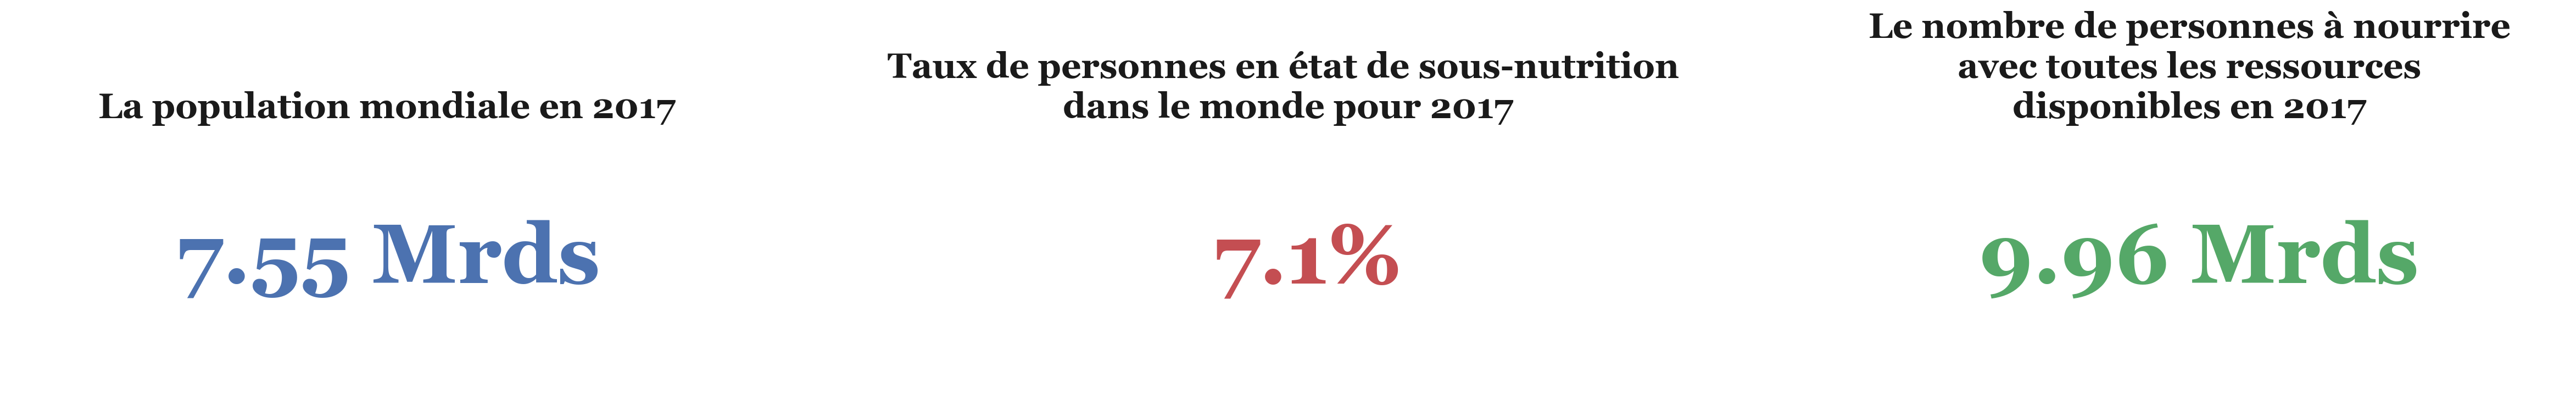

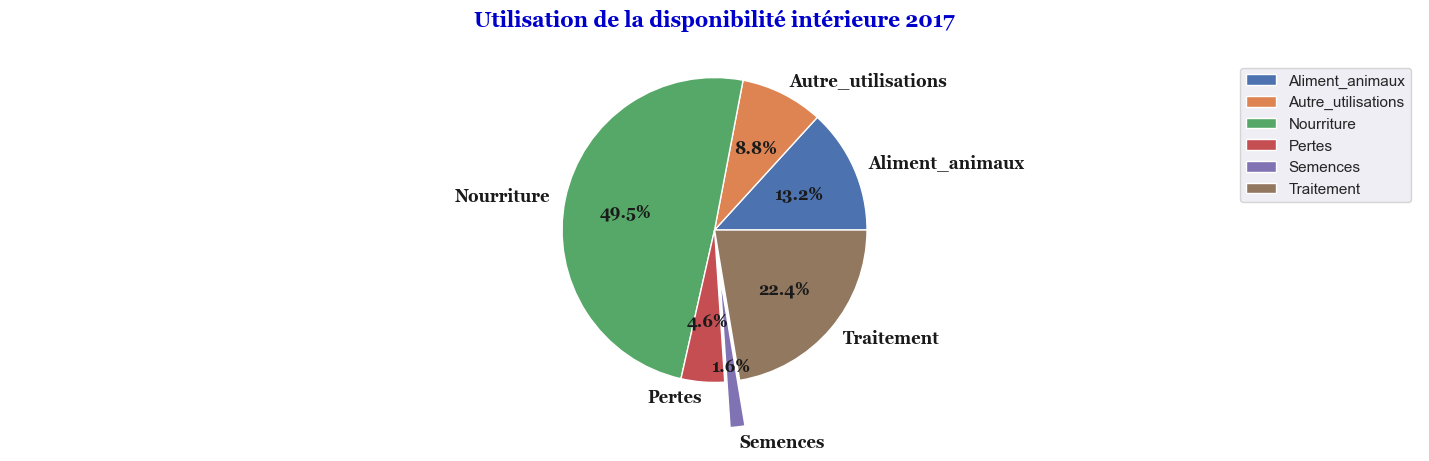

In [149]:
sns.set_style("darkgrid")
sns.set_theme("notebook")
fig = plt.figure(figsize=(30,2), dpi=200, facecolor="white")
ax1 = fig.add_subplot(131)
ax1.set_facecolor(color="white")
ax1.text(0.22, 0.0, f"{population_mondial_2017/1000000000:.2f} Mrds\n", size=55, c="b", fontname="Georgia", fontweight="bold")
ax1.set_axis_off()
ax1.set_title("La population mondiale en 2017\n\n", 
              size=23, fontname="Georgia", fontweight="bold", color="k")

ax2 = fig.add_subplot(132)
ax2.set_facecolor(color="white")
ax2.text(0.4, 0.0, f"{taux_sous_nutrition_2017}%\n", size=55, c="r", fontname="Georgia", fontweight="bold")
ax2.set_axis_off()
ax2.set_title("Taux de personnes en état de sous-nutrition \ndans le monde pour 2017\n\n", 
              size=23, fontname="Georgia", fontweight="bold", color="k")

ax3 = fig.add_subplot(133)
ax3.set_facecolor(color="white")
ax3.text(0.22, 0.0, f"{nb_personnes/1000000000:.2f} Mrds\n", size=55, c="g", fontname="Georgia", fontweight="bold")
ax3.set_axis_off()
ax3.set_title("Le nombre de personnes à nourrire\navec toutes les ressources\ndisponibles en 2017\n\n", 
              size=23, fontname="Georgia", fontweight="bold", color="k")



fig2 = plt.figure(figsize=(40,5), dpi=100, facecolor="white")
ax = fig2.add_subplot(121)
ax.set_axis_off()
#plt.figure(figsize=(7,5))

data = df_dispo_2.loc[:, ~df_dispo_2.columns.isin(
    ["Pays", "Origine", "Produit",
     "Dispo_interieur"])].sum()

data.plot(kind="pie", explode=(0,0,0,0,0.3,0), subplots=True, labels=data.index,
                                              fontsize=12, autopct="%1.1f%%",
                                              textprops={"fontweight":"bold", "color":"k", "fontname":"Georgia"})

plt.axis("equal")

plt.title("Utilisation de la disponibilité intérieure 2017\n", 
          fontweight="bold", fontname="Georgia", size=15, color="mediumblue", loc="center")
ax.legend()
plt.show()

<p><i>En 2017, la population mondiale s'élevait à 7.55 milliards de personnes, alors que les ressources disponibles permettaient théoriquement de nourrir 9.96 milliards d’individus. Pourtant, 7.1 % de la population mondiale était en état de sous-nutrition. Qu'est ce qui peut donc expliquer cette situation ?</i></p>

<i><p>Comme le montre le graphique sur l'utilisation des ressources, nous constatons que toutes ne sont pas destinées à l'alimentation humaine. Environ 50 % des ressources sont utilisées pour nourrir les populations, 13 % pour l'alimentation animale, 4.6 % sont perdues, et le reste est consacré aux traitements, aux semences, et à d'autres usages. Ce qui veut donc dire que les ressources alimentaires disponibles n'était utilisées que pour nourrire 5 Milliards de personnes. C'est ce qui pouvait être à l'origine de la sous-nutrition dans le monde en 2017</i></p>

In [150]:
df_info_pays = pd.read_excel("data/world_administrative_boundaries.xlsx", usecols=["French Name", "ISO 3 country code", "Continent of the territory"])
df_info_pays = df_info_pays.rename(columns={"French Name":"Pays", "ISO 3 country code":"code_pays", "Continent of the territory":"Continent"})
df_info_pays.head()

,code_pays,Continent,Pays
0,USA,Oceania,Northern Mariana Islands
1,RUS,Asia,Kuril Islands
2,FRA,Europe,France
3,SRB,Europe,Serbie
4,URY,Americas,Uruguay


In [151]:
data = pd.merge(df_sous_nutrition.loc[df_sous_nutrition["Annee"] == 2017], df_info_pays, on=["Pays"], how="left")
data.head(2)

,Pays,Annee,Nb_personnes,code_pays,Continent
0,Afghanistan,2017,10500000.0,AFG,Asia
1,Afrique du Sud,2017,3100000.0,ZAF,Africa


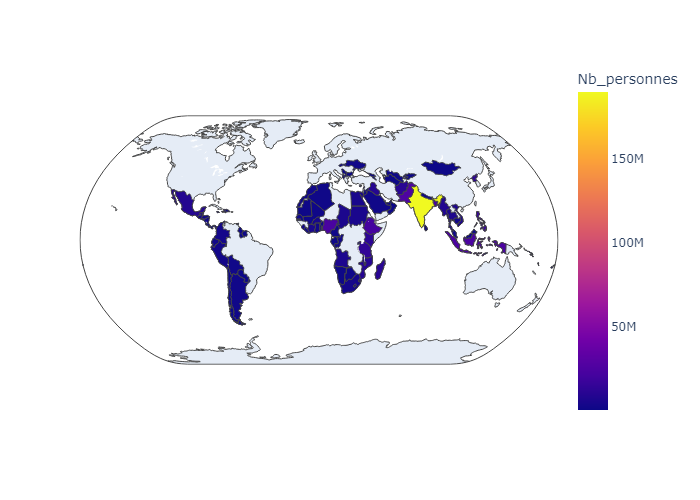

In [152]:
# Active l'affichage en PNG pour GitHub
pio.renderers.default = 'png'

fig = px.choropleth(data_frame=data, locations="code_pays", color="Nb_personnes", 
                    hover_name="Pays", projection="natural earth")
fig.show()

<p><i>Cette carte nous montre la répartition du nombre de personnes en état de sous-nutrition dans le monde en 2017. Comme nous pouvons ... </i></p>

<h4><a name="3.2"><span style="color:lightblue"><b>3.2- Analyse détaillée de la sous-nutrition dans certains pays</b></span></a></h4>

<p>Dans cette partie, nous allons faire une étude de certains pays parmis ceux le plus affectés par la sous-nutrition, ceux qui bénéficie le plus d'aide internationale et ceux avec une faible disponibilité alimentaire par habitant.<br><br> Pour ce faire, nous allons utilisé certain indicateur essentiel à notre étude qui nous donnerons des informations plus précises sur la production, l'importation, l'exportation et la variation de stock des pays.</p>

* ***Le taux de dépendance aux importations (TDI):***
    * C’est la part des importations dans l’approvisionnement alimentaire total d’un pays. Il indique à quel point un pays compte sur l’extérieur pour nourrir sa population.
    * ```TDI = Importation * 100 / Disponibilité intérieur```

        * TDI > 50 % => forte dépendance extérieur => vulnérabilité en cas de crise mondiale

        * TDI < 20 % => Relative autonomie alimentaire


* ***Le taux d'autosuffisance alimentaire (TAS):***
    * Il mesure la capacité d’un pays à couvrir ses besoins alimentaires avec sa propre production.
    * ```TAS = Production * 100 / Disponibilité intérieur ```

        * TAS > 100 % => Le pays produit plus que ses besoins => excédentaire

        * TAS < 100 % => Il dépend de l'extérieur

* ***Le taux d’exportation alimentaire (TE):***
    * Il mesure la part des ressources alimentaires produites dans un pays qui sont exportées au lieu d’être utilisées pour nourrir la population locale.
    * ```TE = Exportation * 100 / Disponibilité intérieur``` 

        * TE < 10 % => Faible => la majorité de la production reste dans le pays.

        * 10 % < TE < 30 % => Modéré => le pays exporte une part notable de sa production, mais cela reste équilibré.

        * TE > 30 % => Élevé => une grande partie de la production quitte le pays, ce qui peut être préoccupant si la population souffre de sous-nutrition.

        * TE > 50 % => Très élevé => le pays est probablement orienté vers l’agriculture d’exportation, parfois au détriment de la consommation locale.

* ***Le taux de dépendance aux exportations (TDE):***
    * C’est la part de la production agricole ou alimentaire d’un pays qui est destinée à l’exportation. Cela indique dans quelle mesure un pays dépend des exportations pour faire fonctionner son système agricole (par exemple pour générer des revenus, des devises, etc.).
    * ```TDE = Exportation * 100 / Production```

        * TDE < 10 % => Faible => Le pays garde l’essentiel de sa production pour sa consommation intérieure.

        * 10 % < TDE < 30 % => Modéré => L’agriculture est partiellement tournée vers l’export.

        * TDE > 30 % => Élevé => L’économie agricole devient dépendante de l’exportation.

        * TDE > 50 % => Très élevé => Forte dépendance aux marchés extérieurs pour valoriser la production. Si les marchés s'effondrent → danger

* ***Le taux de variation de stock (TVS):***
    * C’est la part de la disponibilité alimentaire (ou de la production) qui est stockée ou déstockée au cours d’une période (généralement un an).
    * ```TVS = Variation de stock * 100 / Disponibilité alimentaire```

        * TVS > 0 : le pays met de côté une partie de ses ressources => bonne stratégie de réserve, mais baisse de la nourriture disponible immédiatement.

        * TVS < 0 : le pays pioche dans ses réserves => peut être un signe de crise, de mauvaise récolte ou de déséquilibre.

Cette étude détaillée par pays sera faite au moyen de la fonction "analyse_sous_nutrition_par_pays" qui donne en sortie une représentation graphique des indicateurs ci-dessus. 


<h5><a name="3.2.1"><span style="color:blue"><b>3.2.1- Cas des pays pour lesquels la proportion de personnes sous-alimentées est la plus fortes en 2017</b></span></a></h5>

<p> Ici, nous nous interesserons au top 10 des pays les plus affectés par la sous-nutrition, puis nous ferons une analyse plus approfondie sur deux d'entre-eux. <p>

In [153]:
df_sous_nutrition.head()

,Pays,Annee,Nb_personnes
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [154]:
df_sous_nutrition_2017 = df_sous_nutrition.loc[df_sous_nutrition["Annee"] == 2017, :]
df_sous_nutrition_2017.head()

,Pays,Annee,Nb_personnes
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Angola,2017,5800000.0


In [155]:
df_population.loc[df_population["Annee"] == 2017]

,Pays,Annee,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


In [156]:
# On ajoute la population pour avoir le taux de personne en état de sous-nutrition
df_sous_nutrition_2017 = pd.merge(df_sous_nutrition_2017, df_population.loc[df_population["Annee"] == 2017, 
                                                                               ["Pays", "Population", "Annee"]], on=["Pays", "Annee"], how="right")

df_sous_nutrition_2017.head()
# df_sous_nutrition_2017["Nb_personnes"] = df_sous_nutrition_2017["Nb_personnes"].fillna(0)
df_sous_nutrition_2017.head()

,Pays,Annee,Nb_personnes,Population
0,Afghanistan,2017,10500000.0,36296113.0
1,Afrique du Sud,2017,3100000.0,57009756.0
2,Albanie,2017,100000.0,2884169.0
3,Algérie,2017,1300000.0,41389189.0
4,Allemagne,2017,NaN,82658409.0


In [157]:
df_sous_nutrition_2017.dtypes

Pays             object
Annee             int64
Nb_personnes    float64
Population      float64
dtype: object

In [158]:
# On calcule le taux de sous-nutrition
# population_mondial_2017
df_sous_nutrition_2017["Taux_sous_nutrition"] = round(df_sous_nutrition_2017["Nb_personnes"]*100/df_sous_nutrition_2017["Population"], 2)
# df_sous_nutrition_2017["Taux_sous_nutrition"] = round(df_sous_nutrition_2017["Nb_personnes"]*100/population_mondial_2017, 2)
df_sous_nutrition_2017.head()

,Pays,Annee,Nb_personnes,Population,Taux_sous_nutrition
0,Afghanistan,2017,10500000.0,36296113.0,28.93
1,Afrique du Sud,2017,3100000.0,57009756.0,5.44
2,Albanie,2017,100000.0,2884169.0,3.47
3,Algérie,2017,1300000.0,41389189.0,3.14
4,Allemagne,2017,NaN,82658409.0,NaN


In [159]:
df_sous_nutrition_2017.sort_values(by="Taux_sous_nutrition", ascending=False).head(10)

,Pays,Annee,Nb_personnes,Population,Taux_sous_nutrition
56,Dominique,2017,50000.0,71458.0,69.97
87,Haïti,2017,5300000.0,10982366.0,48.26
181,République populaire démocratique de Corée,2017,12000000.0,25429825.0,47.19
196,Saint-Vincent-et-les Grenadines,2017,50000.0,109827.0,45.53
117,Kiribati,2017,50000.0,114158.0,43.80
128,Madagascar,2017,10500000.0,25570512.0,41.06
122,Libéria,2017,1800000.0,4702226.0,38.28
119,Lesotho,2017,800000.0,2091534.0,38.25
216,Tchad,2017,5700000.0,15016753.0,37.96
186,Rwanda,2017,4200000.0,11980961.0,35.06


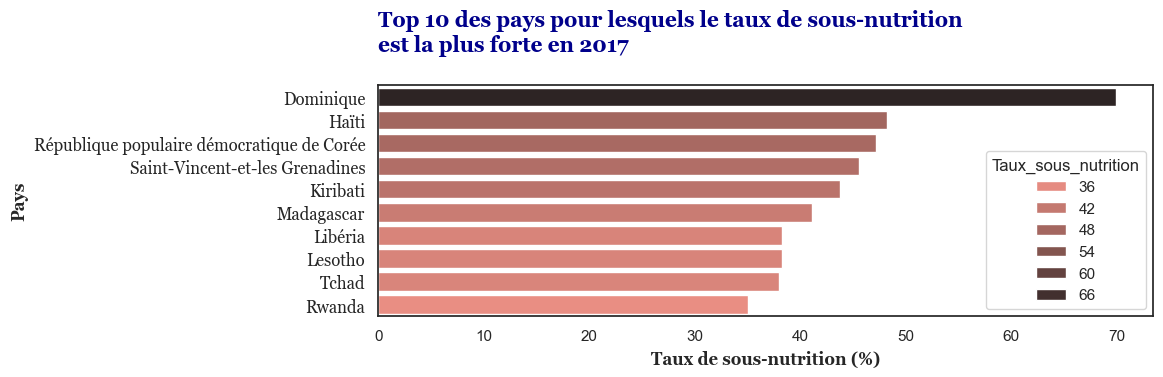

In [160]:
data = df_sous_nutrition_2017.sort_values("Taux_sous_nutrition", ascending=False).head(10)

sns.set_style("white")
sns.set_context("notebook")

fig = plt.figure(figsize=(10,3), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
sns.barplot(data=data, y="Pays", x="Taux_sous_nutrition", hue="Taux_sous_nutrition", palette="dark:salmon_r")
ax.set_yticks(data["Pays"])
ax.set_yticklabels(data["Pays"], rotation=0, fontname="Georgia", size=12)
ax.set_xlabel("Taux de sous-nutrition (%)", size = 12, fontname="Georgia", fontweight="bold")
ax.set_ylabel("Pays", size = 12, fontname="Georgia", fontweight="bold")
ax.set_title("Top 10 des pays pour lesquels le taux de sous-nutrition\nest la plus forte en 2017\n", 
             fontname="Georgia", fontweight="bold", size=15, color="darkblue", loc="left")

# Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
plt.show()

<p><i>On observe que le pays le plus touché est la Dominque, avec un taux de sous-nutrition atteignant 70 %. Il est suivi par Haïti et la République populaire démocratique de Corée avec un taux de sous-nutrition qui dépassent également 47 %. Globalement, les taux restent très élevés pour tous les pays du classement, oscillant entre 35 % et 70%.<br>
La majorité des pays présents dans ce top 10 appartient l'Afrique sub-saharienne, ce qui souligne une concentration régionale de l’insécurité alimentaire.</i></p>

In [161]:
data = pd.merge(df_sous_nutrition_2017, df_info_pays, on=["Pays"], how="left")
data.head(2)

,Pays,Annee,Nb_personnes,Population,Taux_sous_nutrition,code_pays,Continent
0,Afghanistan,2017,10500000.0,36296113.0,28.93,AFG,Asia
1,Afrique du Sud,2017,3100000.0,57009756.0,5.44,ZAF,Africa


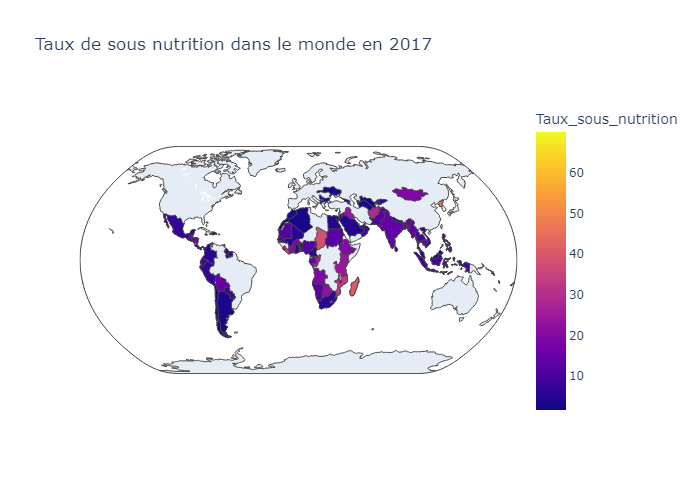

In [162]:
# Active l'affichage en PNG pour GitHub
pio.renderers.default = 'png'

fig = px.choropleth(data_frame=data, locations="code_pays", color="Taux_sous_nutrition", 
                    hover_name="Pays", projection="natural earth", title="Taux de sous nutrition dans le monde en 2017")
fig.show()

<p><i>Commentaire ... </i></p>

<p><i>Ci-dessous est présentée une étude approfondie sur la Dominique et Haïti afin d'essayer d'expliquer ce qui pourrait être à l'origine de la sous-nutrtion dans leur cas.</i></p>

In [163]:
# fonction pour l'analyse de la sous nutrition par pays 
def analyse_sous_nutrition_par_pays(pays: str="Dominique", facteur: int=1000, unite: str="Milles", e_o: float=0, e_s: float=0, teta: int=0, hb: int=5):
    df = df_sous_nutrition_2017.loc[df_sous_nutrition_2017["Pays"] == pays]

    # Kcal/pers/jour
    energie_alim_necessaire = 2100

    # Energie alimentaire disponible de dominique en 2017
    energie_alim_dispo_2017 = df_nrj_necessaire.loc[df_nrj_necessaire["Pays"] == pays, "Disponibilité alimentaire (Kcal/jour)"].sum()

    # Le nombre de personne qu'on pourrait nourrire avec cette energie mondiale est de : 
    nb_personnes = energie_alim_dispo_2017 / energie_alim_necessaire
    
    # data1 utilisé pour avoir la part de la dispo alimentaire destiné à la nourriture, les pertes ...
    data1 = df_dispo_2.loc[(df_dispo_2["Pays"] == pays), 
                        ~df_dispo_2.columns.isin(["Pays", "Origine", "Produit","Dispo_interieur"])].sum()
    
    # La part de la nourriture 
    taux_food = data1["Nourriture"]/data1.sum()
    
    # data2 utilisé pour avoir le diagramme en bar
    df2 = df_dispo_1[["Pays", "Dispo_interieur", "Exportations", "Importations", "Production", "Variation_stock"]].groupby(by="Pays").sum().reset_index()
    df2["TDI"] = round(df2["Importations"]*100 / df2["Dispo_interieur"], 2)
    df2["TAS"] = round(df2["Production"]*100 / df2["Dispo_interieur"], 2)
    df2["TE"] = round(df2["Exportations"]*100 / df2["Dispo_interieur"], 2)
    df2["TDE"] = round(df2["Exportations"]*100 / df2["Production"], 2)
    df2["TVS"] = round(df2["Variation_stock"]*100 / df2["Dispo_interieur"], 2)

    data2 = df2.loc[df2["Pays"] == pays, ["TDI", "TAS", "TE", "TVS"]].sum()
    data2 = data2.reset_index()
    data2 = data2.rename(columns={0:"Taux"})
    
    font2 = {"size":12, "fontname":"Georgia", "fontweight":"bold"}
    
    # ================================================================
    sns.set_style("white")
    sns.set_theme("notebook")
    fig = plt.figure(figsize=(30,2), dpi=200, facecolor="white")
    ax1 = fig.add_subplot(131)
    ax1.set_facecolor(color="white")
    ax1.text(0.22, 0.0, f"{df["Population"].values[0]/facteur:.2f} {unite}\n", size=55, c="b", fontname="Georgia", fontweight="bold")
    ax1.set_axis_off()
    ax1.set_title(f"{pays} - La population en 2017\n\n", 
                size=23, fontname="Georgia", fontweight="bold", color="k")

    ax2 = fig.add_subplot(132)
    ax2.set_facecolor(color="white")
    ax2.text(0.4, 0.0, f"{df["Taux_sous_nutrition"].values[0]}%\n", size=55, c="r", fontname="Georgia", fontweight="bold")
    ax2.set_axis_off()
    ax2.set_title(f"{pays} - Taux de personnes \nen état de sous-nutrition \nen 2017\n", 
                size=23, fontname="Georgia", fontweight="bold", color="k")

    ax3 = fig.add_subplot(133)
    ax3.set_facecolor(color="white")
    ax3.text(0.22, 0.0, f"{nb_personnes/facteur:.2f} {unite}\n", size=55, c="g", fontname="Georgia", fontweight="bold")
    ax3.set_axis_off()
    ax3.set_title(f"{pays} - Le nombre de personnes théorique\nà nourrire avec les ressources disponibles en 2017\n", 
                size=23, fontname="Georgia", fontweight="bold", color="k")

    # ================================================================
    sns.set_style("white")
    sns.set_theme("notebook")

    fig1 = plt.figure(figsize=(40,3), dpi=100, facecolor="white")
    ax1 = fig1.add_subplot(121)

    sns.barplot(data=data2, x="index", y="Taux", hue="index")

    plt.title(f"{pays} - Utilisation de la disponibilité intérieure 2017\n", 
            fontweight="bold", fontname="Georgia", size=15, color="mediumblue", loc="left")
    
    taux_list = data2["Taux"].to_list()
    for i, val in enumerate(taux_list):
            ax1.text(x=i-0.08, y=val+hb, s=val, fontdict=font2)

    # ax.set_axis_off()
    plt.xlabel("Etiquettes", fontdict=font2)
    plt.ylabel("(%)", fontdict=font2)
    plt.show()
    
    # ================================================================
    fig2 = plt.figure(figsize=(40,5), dpi=100, facecolor="white")
    ax2 = fig2.add_subplot(121)
    ax2.set_axis_off()
    #plt.figure(figsize=(7,5))

    data1.plot(kind="pie", explode=(0,e_o,0,0,e_s,0), subplots=True, labels=data1.index,
                                                fontsize=12, autopct="%1.1f%%",
                                                textprops={"fontweight":"bold", "color":"k", "fontname":"Georgia"},
                                                startangle=teta)

    plt.axis("equal")

    plt.title(f"{pays} - Utilisation de la disponibilité intérieure 2017\n", 
            fontweight="bold", fontname="Georgia", size=15, color="mediumblue", loc="center")
    ax2.legend()
    plt.show()

    # ================================================================

    
# analyse_sous_nutrition_par_pays()

<h7><a name="3.2.1.1"><span style="color:orange"><b>3.2.1.1- Analyse de la situation alimentaire de la Dominique</b></span></a></h7>

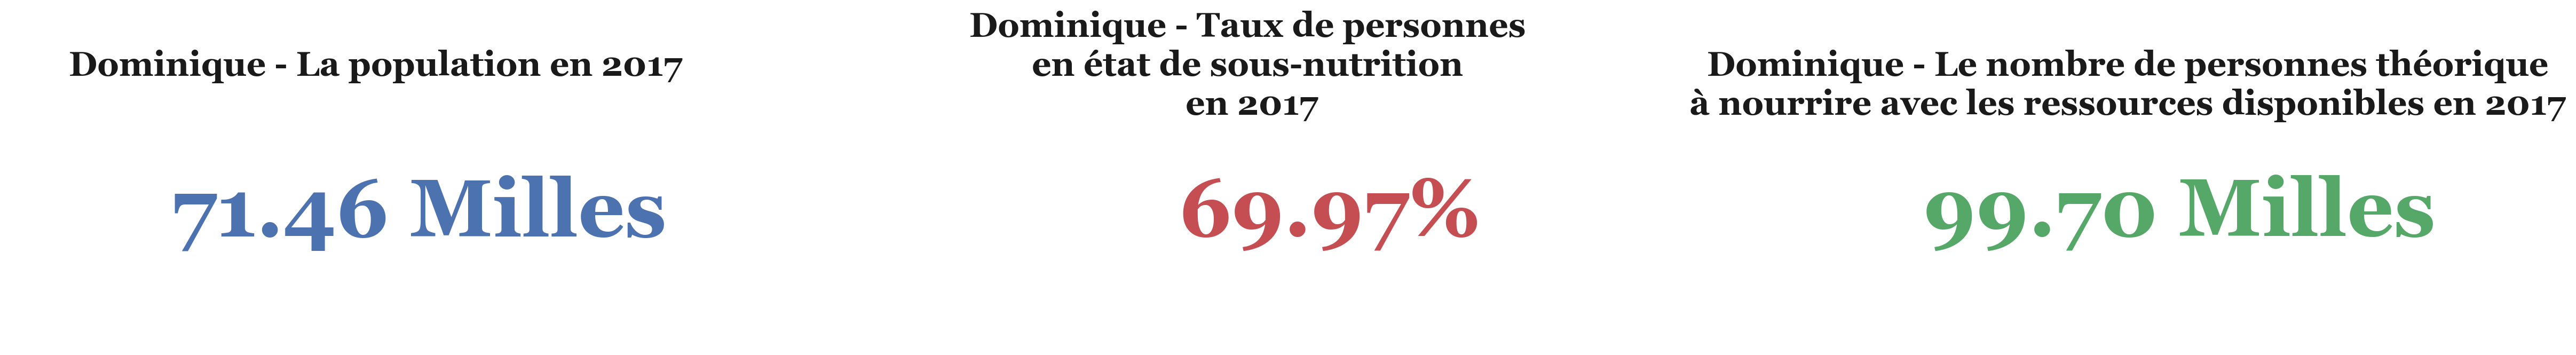

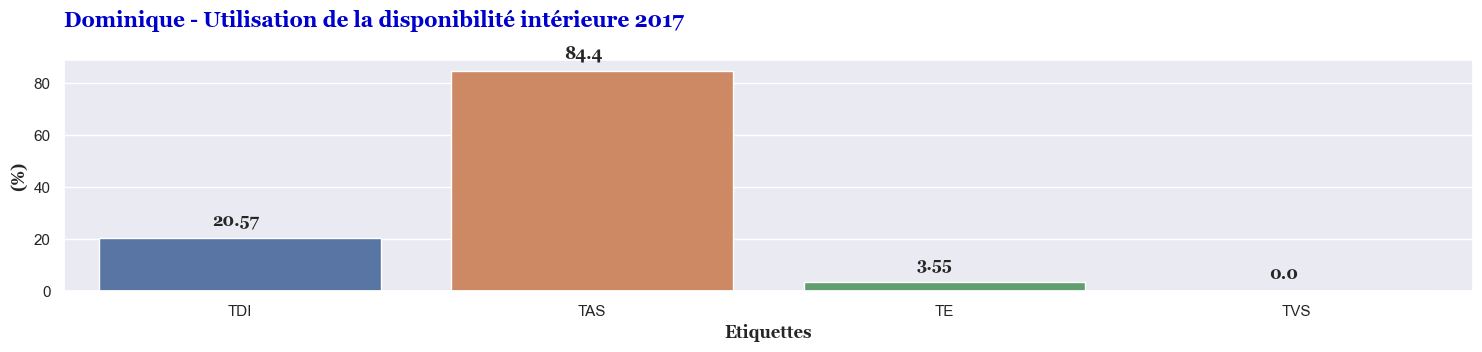

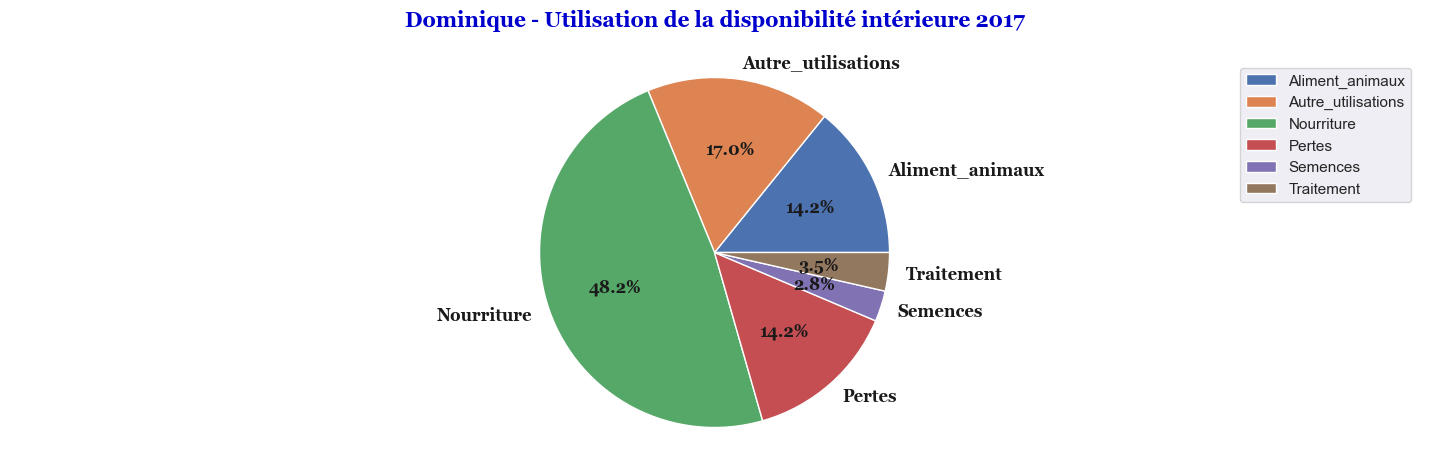

In [164]:
analyse_sous_nutrition_par_pays()

<p><i>En 2017, la Domique comptait environ 71,46 milliers d’habitants, dont près de 70 % étaient en situation de sous-nutrition. Pourtant, les ressources alimentaires disponibles auraient théoriquement permis de nourrir jusqu’à 99,7 milliers de personnes, soit bien au-delà de sa population réelle.<br>

Cela montre qu’en théorie, la Domique produisait suffisamment de nourriture pour subvenir aux besoins de toute sa population, voire davantage. Cette idée est confirmée par le graphique 2, qui indique un taux d’autosuffisance (TAS) de 84 % et un taux de dépendance aux importations (TDI) de 21 %. Autrement dit, la production nationale couvrait l’essentiel des besoins alimentaires, avec seulement un complément d’importations.<br>

De plus, le faible taux d’exportation (TE) révèle que la Domique ne privilégie pas la vente de sa production à l’étranger au détriment de son marché intérieur. La majeure partie des denrées produites est donc destinée à nourrir la population locale. Enfin, l'absence de variation de stock (TVS = 0 %) témoigne d'une certaine stabilité : ni pénurie, ni excédent alimentaire important n’a été observé cette année-là.<br>

Ainsi, le problème de sous-nutrition en Domique en 2017 ne semble pas lié à une insuffisance de production alimentaire, mais plutôt à des facteurs structurels, tels que la mauvaise répartition des ressources, l’accès limité à la nourriture, les pertes alimentaires, ou encore l’utilisation non alimentaire des denrées. Le graphique en camembert vient appuyer cette analyse en montrant que moins de 50 % de la disponibilité alimentaire est consacrée à la consommation humaine, le reste étant utilisé pour d'autres usages, perdu (~ 14 %), ou réservé aux semences.</i></p>

<h7><a name="3.2.1.2"><span style="color:orange"><b>3.2.1.2- Analyse de la situation alimentaire de l'Haïti</b></span></a></h7>

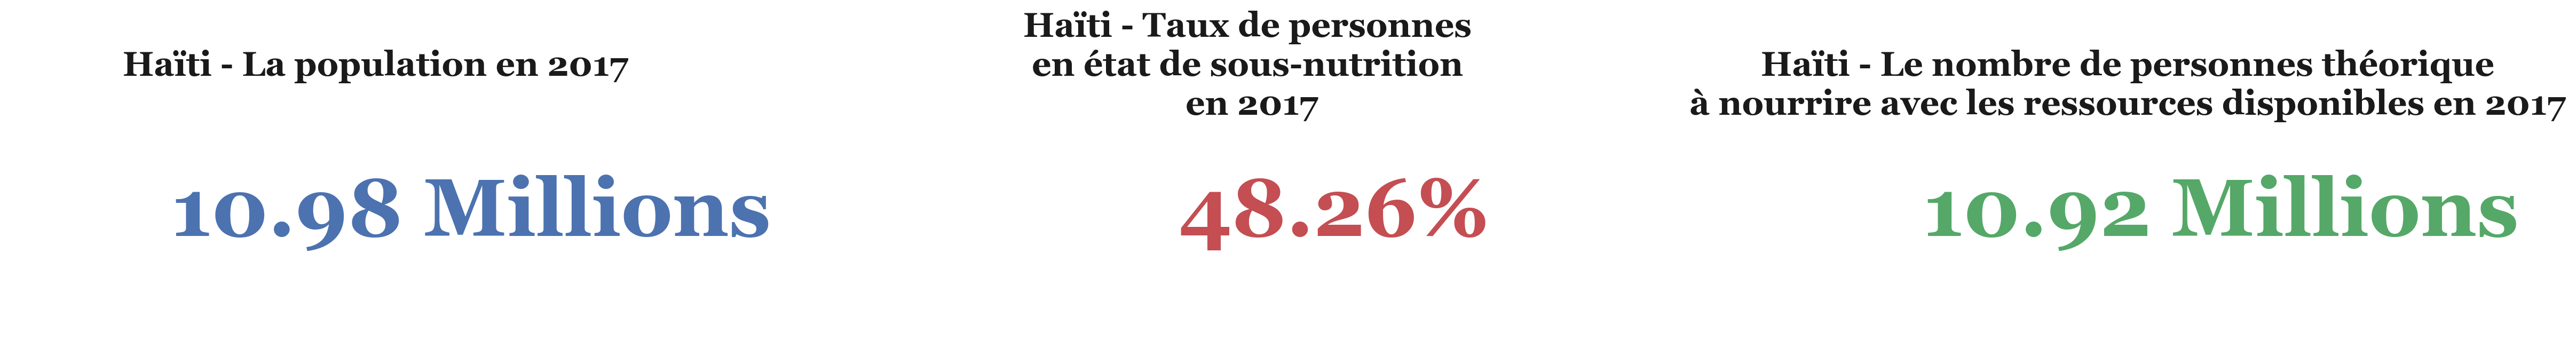

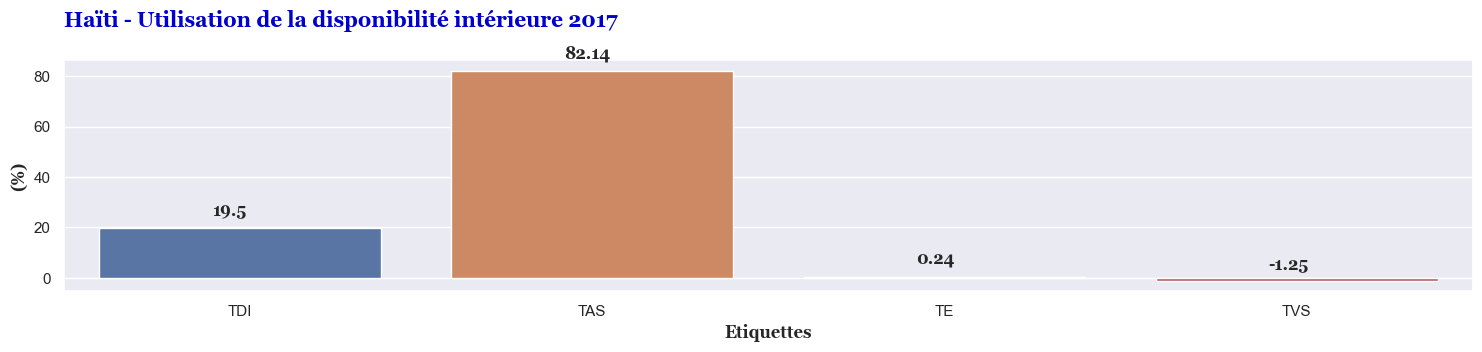

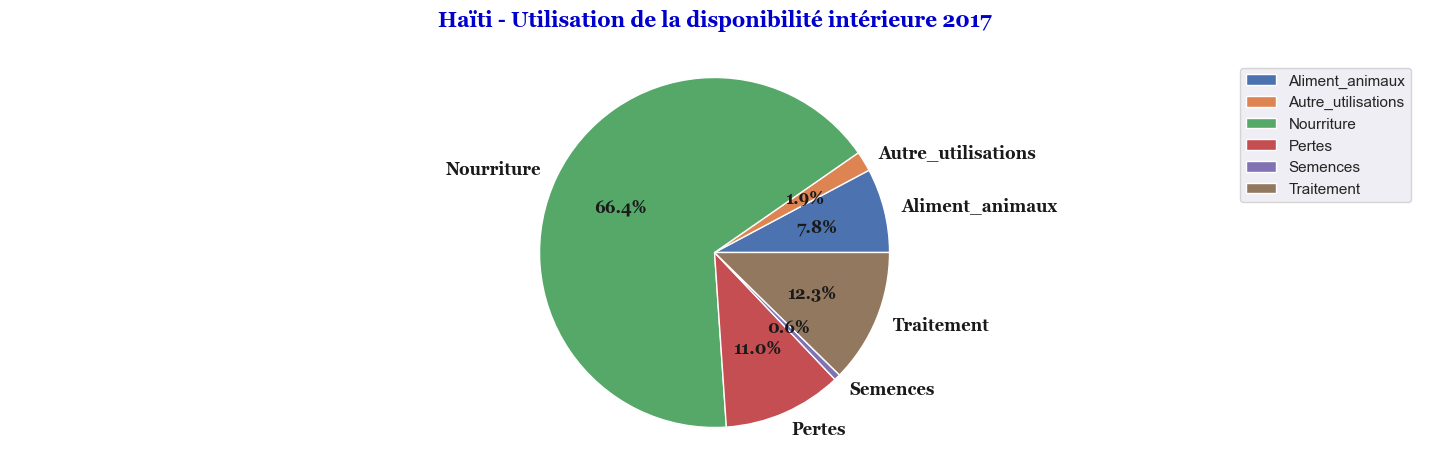

In [165]:
analyse_sous_nutrition_par_pays(pays="Haïti", facteur=1000000, unite="Millions")

<p><i>En 2017, Haïti disposait de ressources alimentaires insuffisantes pour couvrir entièrement les besoins de sa population : la disponibilité théorique permettait de nourrir 10,92 millions de personnes, alors que la population réelle était de 10,98 millions d'habitants. Ce calcul, effectué sur la base d'une population peu active, souligne une autosuffisance incomplète.<br>

Cette situation est confirmée par les indicateurs : un taux d'autosuffisance (TAS) de 82 % et un taux de dépendance aux importations (TDI) de 19 %. Par ailleurs, le taux d'exportation (TE) était très faible (0,24 %), ce qui montre que presque toute la production était destinée au marché intérieur, un élément positif pour la sécurité alimentaire.<br>

Cependant, le taux de variation de stock (TVS) de -1,25 % indique que le pays devait puiser légèrement dans ses réserves pour compenser le déficit. Malgré la production locale et les importations, l'ensemble de la population ne pouvait être entièrement alimenté. De plus, seulement 66 % de la disponibilité alimentaire était réellement utilisée pour la consommation humaine, comme le montre le graphique 3, ce qui aggrave encore la situation.<br>

Ainsi, la sous-nutrition en Haïti semble principalement liée à une production insuffisante par rapport aux besoins, aggravée par une part importante des ressources alimentaires utilisées à d'autres fins.</i></p>

<h5><a name="3.2.2"><span style="color:blue"><b>3.2.2- Cas des pays qui ont le plus bénéficié d'aide depuis 2013</b></span></a></h5>

<p> Ici, nous nous interesserons au top 10 des pays qui ont reçu le plus d'aides alimentaires, puis nous ferons une analyse plus approfondie sur deux d'entre-eux. <p>

In [166]:
df_aide_alimentaire.head()

,Pays,Annee,Produit,Qte_fournie
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [167]:
df_aide_alimentaire["Annee"].unique()

array([2013, 2014, 2015, 2016])

In [168]:
# Le plus d'aide en tonne
data = df_aide_alimentaire[["Pays", "Qte_fournie"]].\
groupby("Pays").sum().sort_values("Qte_fournie", ascending=False).head(10).reset_index()

aide_mondial_fourni = data["Qte_fournie"].sum()

# Pour le mettre en Ktonnes
data["Qte_fournie"] = data["Qte_fournie"]/1000

# Le moins d'aide en tonne
data2 = df_aide_alimentaire[["Pays", "Qte_fournie"]].\
groupby("Pays").sum().sort_values("Qte_fournie", ascending=True).head(10).reset_index()

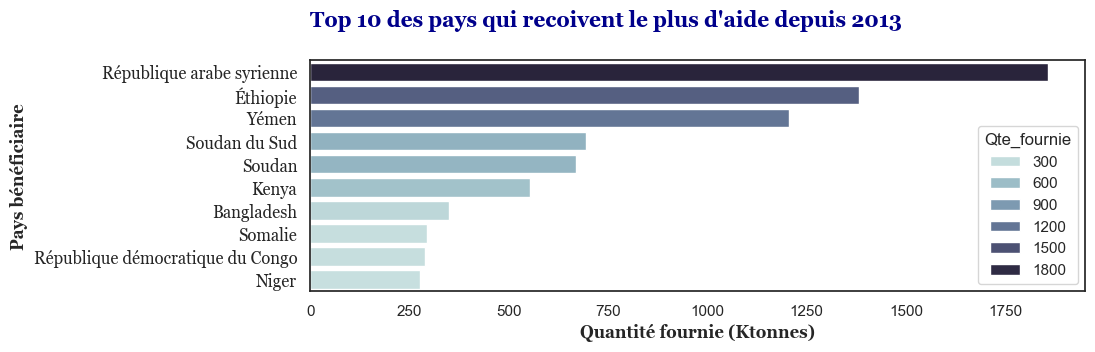

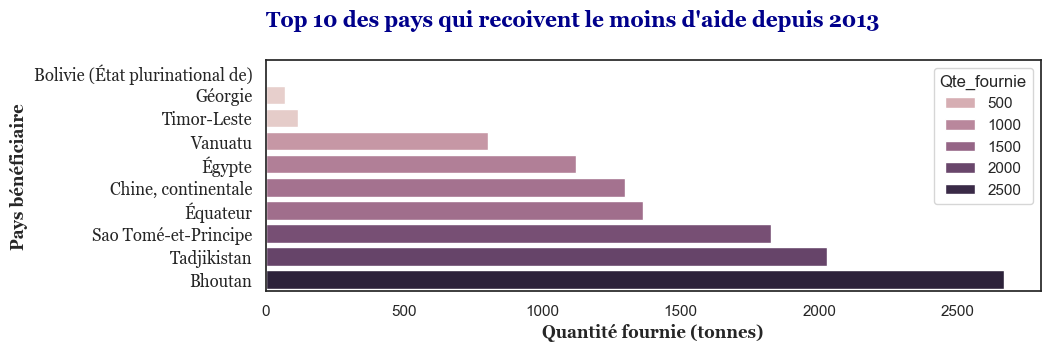

In [169]:
sns.set_style("white")
sns.set_context("notebook")

# Le plus d'aide
fig = plt.figure(figsize=(10,3), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
sns.barplot(data=data, y="Pays", x="Qte_fournie", hue="Qte_fournie", palette="ch:start=.2,rot=-.3")
ax.set_yticks(data["Pays"])
ax.set_yticklabels(data["Pays"], rotation=0, fontname="Georgia", size=12)
ax.set_xlabel("Quantité fournie (Ktonnes)", size = 12, fontname="Georgia", fontweight="bold")
ax.set_ylabel("Pays bénéficiaire", size = 12, fontname="Georgia", fontweight="bold")
ax.set_title("Top 10 des pays qui recoivent le plus d'aide depuis 2013\n", 
             fontname="Georgia", fontweight="bold", size=15, color="darkblue", loc="left")


# Le moins d'aide
fig = plt.figure(figsize=(10,3), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
sns.barplot(data=data2, y="Pays", x="Qte_fournie", hue="Qte_fournie")
ax.set_yticks(data2["Pays"])
ax.set_yticklabels(data2["Pays"], rotation=0, fontname="Georgia", size=12)
ax.set_xlabel("Quantité fournie (tonnes)", size = 12, fontname="Georgia", fontweight="bold")
ax.set_ylabel("Pays bénéficiaire", size = 12, fontname="Georgia", fontweight="bold")
ax.set_title("Top 10 des pays qui recoivent le moins d'aide depuis 2013\n", 
             fontname="Georgia", fontweight="bold", size=15, color="darkblue", loc="left")

plt.show()

<p><i>Ces diagrammes en barres illustrent la distribution de l'aide alimentaire aux dix plus et moins importants bénéficiaires sur la période de 2013 à 2016. Chaque barre represente la quantité totale d'aide reçue par chaque bénéficiaire durant cette période.<br>

On observe pour le graphe1 que la République arabe syrienne, l'Ethiopie et le Yémen se distinguent nettement des autres avec des barres beaucoup plus haute, recevant chacun plus de 1200 ktonnes d'aide sur la période. Cette domination pourraient indiquer que ces pays, font face à des besoins alimentaires particulièrement importants ou prolongés.<br>

A l'inverse, les pays comme la Bolivie, la Géorgie et le Timor-Lest (graphe2), ont reçu moins de 500 tonnes d'aide alimentaire durant cette période. Montrant une différence significative entre les prémiers (ceux qui recoivent le plus d'aide) et les derniers (ceux qui recoivent le moins d'aide).</i></p>



<h7><a name="3.2.2.1"><span style="color:orange"><b>3.2.2.1- Analyse de la situation alimentaire de l'Ethiopie</b></span></a></h7>

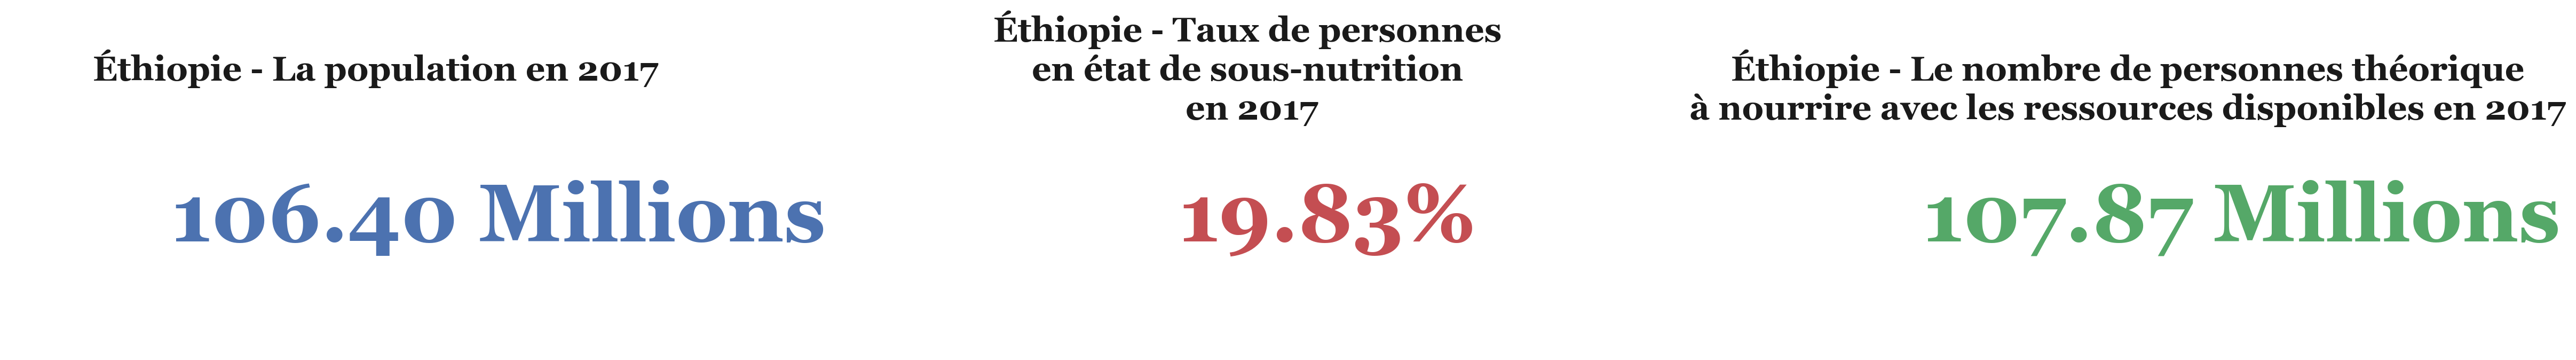

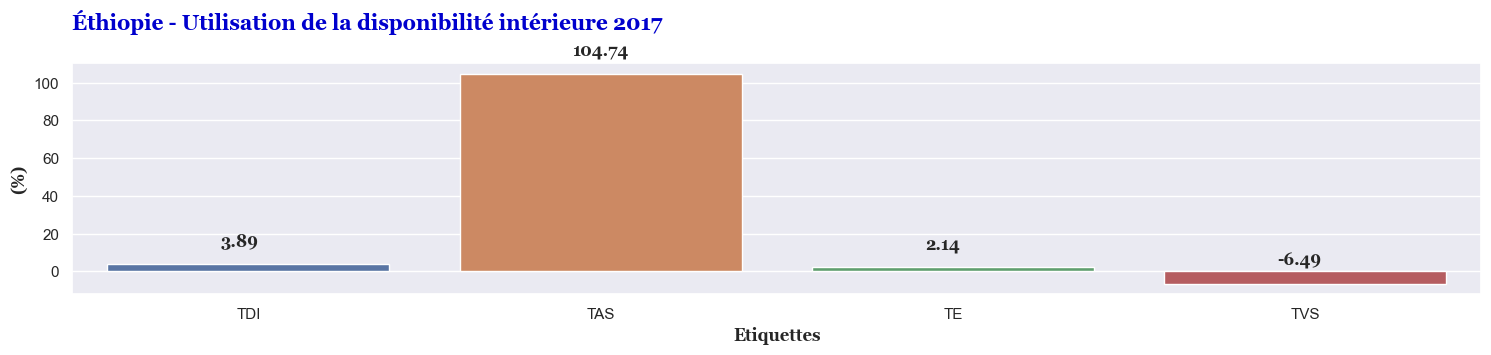

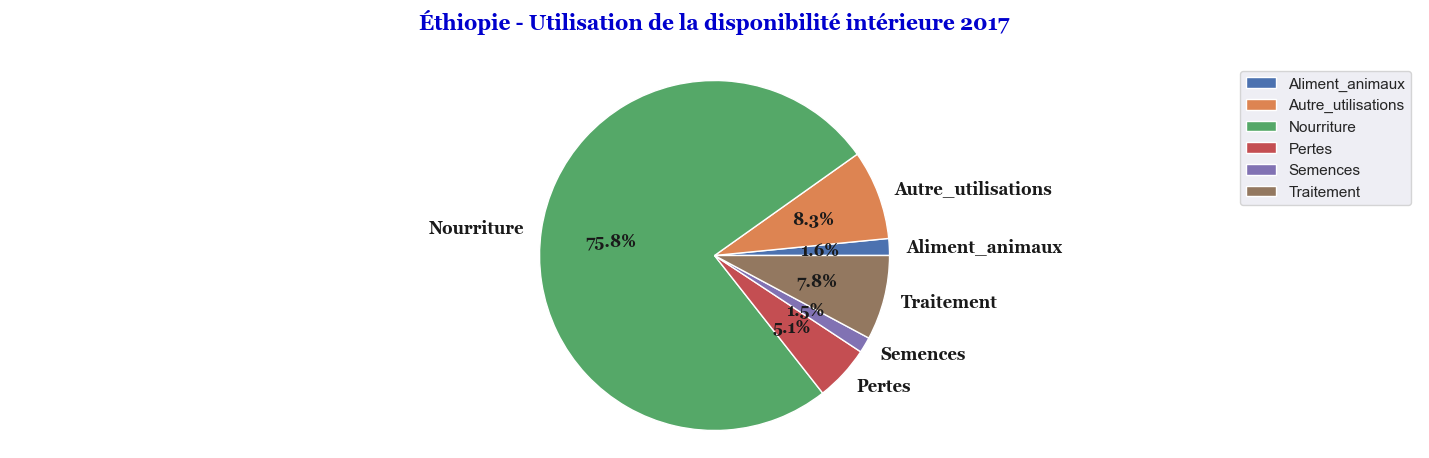

In [170]:
analyse_sous_nutrition_par_pays(pays="Éthiopie", facteur=1000000, unite="Millions", hb=10)

<p><i>En 2017, l'Éthiopie comptait 106,4 millions d’habitants pour une capacité alimentaire théorique pouvant nourrire 107,87 millions de personnes, ce qui montre un léger excédent de ressources alimentaires.<br>

Avec un taux d'autosuffisance (TAS) de 104 %, le pays produisait plus que nécessaire pour couvrir ses besoins alimentaires. De plus, un taux de dépendance aux importations (TDI) de seulement 4 % confirme que l'Éthiopie était largement autonome au niveau alimentaire.
Le taux d'exportation (TE) de 2 % indique que la quasi-totalité de la production restait destinée au marché intérieur, ce qui est positif pour la sécurité alimentaire.<br>

Cependant, le taux de variation de stock (TVS) de -6,5 % montre que le pays a dû puiser de manière notable dans ses réserves, ce qui peut être un signe de tension alimentaire liée à des problèmes de récoltes, de distribution ou de gestion.<br>

Enfin, seulement 75,8 % de la disponibilité alimentaire était utilisée pour la consommation humaine, d'après le graphique 3, ce qui réduit l'efficacité globale de la production disponible pour lutter contre la sous-nutrition.<br>

Ainsi, malgré une production globalement suffisante, la sous-nutrition persistante en Éthiopie peut être expliquée par des problèmes tension alimentaire liée à des problèmes de recoltes, de gestion ou par l'utilisation importante des ressources à d'autres fins que l'alimentation humaine.</i></p>

<h7><a name="3.2.2.2"><span style="color:orange"><b>3.2.2.2- Analyse de la situation alimentaire du Soudan</b></span></a></h7>

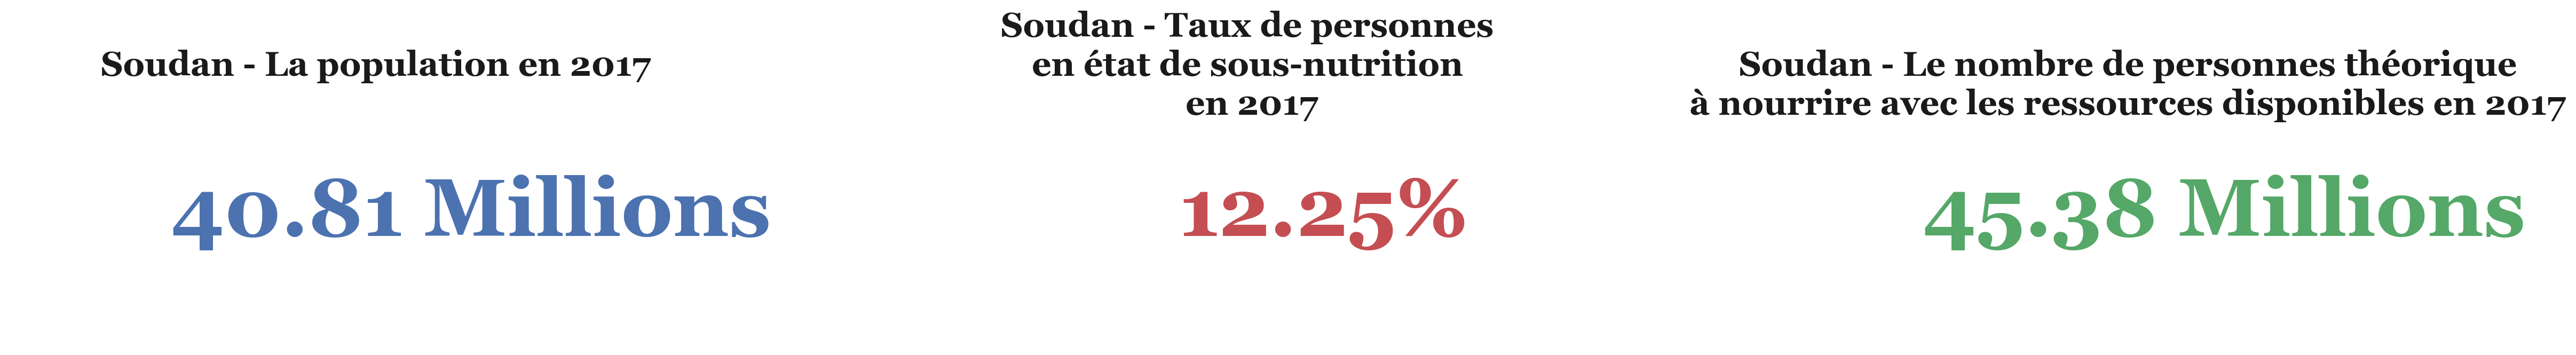

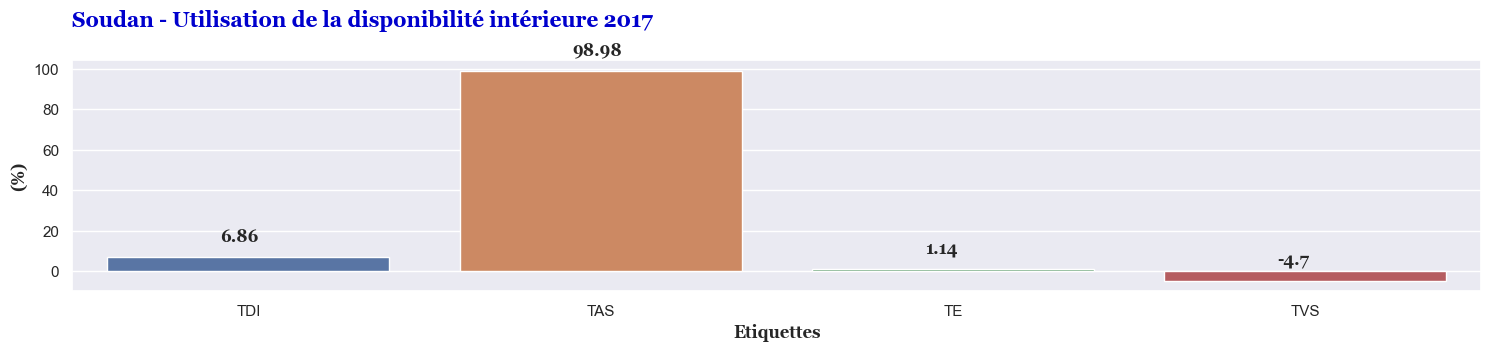

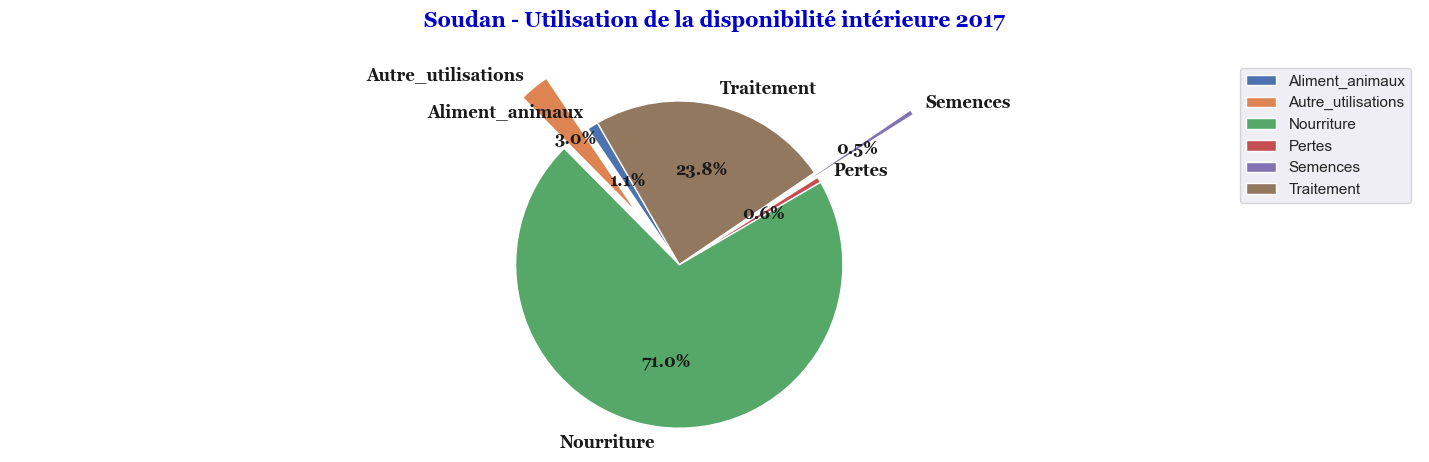

In [171]:
analyse_sous_nutrition_par_pays(pays="Soudan", facteur=1000000, unite="Millions",e_s=0.7, e_o=0.4, teta=120, hb=8)

<p><i>En 2017, le Soudan disposait de ressources alimentaires suffisantes pour nourrir 45,38 millions de personnes, alors que sa population était de 40,81 millions d’habitants. Cela montre un excédent théorique de production.<br>

Le taux d’autosuffisance (TAS) atteignait 99 %, ce qui signifie que le pays couvrait presque entièrement ses besoins par sa propre production. Avec un taux de dépendance aux importations (TDI) de seulement 7 %, le Soudan restait très largement indépendant des marchés extérieurs.
Le taux d’exportation (TE) était faible (1,14 %), indiquant que l’essentiel de la production restait utilisée localement, renforçant la sécurité alimentaire.<br>

Cependant, le taux de variation de stock (TVS) de -4,7 % suggère que le pays a légèrement puisé dans ses réserves, ce qui peut traduire une tension modérée entre l’offre et la demande.<br>

Enfin, seulement 71 % de la disponibilité alimentaire était réellement utilisée pour la consommation humaine selon le graphique 3, ce qui limite un peu l’impact positif de l’excédent théorique.<br>

Ainsi, malgré de bonnes bases de production et d'autosuffisance, la sous-nutrition éventuelle pourrait s'expliquer par une gestion inégale des ressources et des tensions modérée entre l'offre et la demande.</i></p>

<h5><a name="3.2.3"><span style="color:blue"><b>3.2.3- Cas des pays ayant le plus/moins de disponibilité par habitants</b></span></a></h5>

<p>Ici, nous nous interesserons dans un premier temps au top 10 des pays qui avaient le plus de disponibilité par habitant ainsi qu'à ceux qui en avaient le moins. Ensuite, une analyse détaillées sur deux des pays ayant le plus ressources sera faite.<p>

In [172]:
df_nrj_necessaire.head()

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,145184452.0


In [173]:
# df_nrj_necessaire[["Pays", "Disponibilité alimentaire (Kcal/personne/jour)"]].\
# groupby(by="Pays").sum().sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)

In [174]:
data = df_nrj_necessaire[["Pays", "Disponibilité alimentaire (Kcal/personne/jour)"]].\
groupby(by="Pays").sum().sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).reset_index().head(10)

#data["Disponibilité alimentaire (Kcal/personne/jour)"] = data["Disponibilité alimentaire (Kcal/personne/jour)"]/data["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
#data.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)" : "Taux_disponibilite_alimentaire"}, inplace=True)
display(data.head())

data2 = df_nrj_necessaire[["Pays", "Disponibilité alimentaire (Kcal/personne/jour)"]].\
groupby(by="Pays").sum().sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).reset_index().head(10)

#data2["Disponibilité alimentaire (Kcal/personne/jour)"] = data2["Disponibilité alimentaire (Kcal/personne/jour)"]/data2["Disponibilité alimentaire (Kcal/personne/jour)"].sum()
#data2.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)" : "Taux_disponibilite_alimentaire"}, inplace=True)
display(data2.head())


,Pays,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0


,Pays,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0


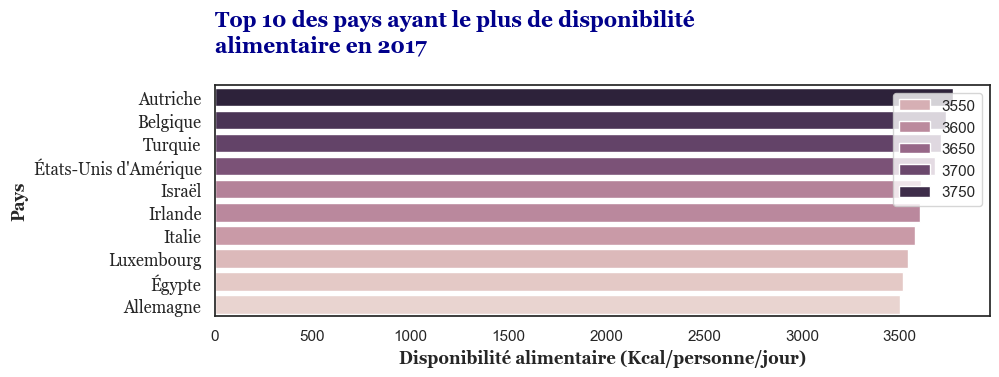

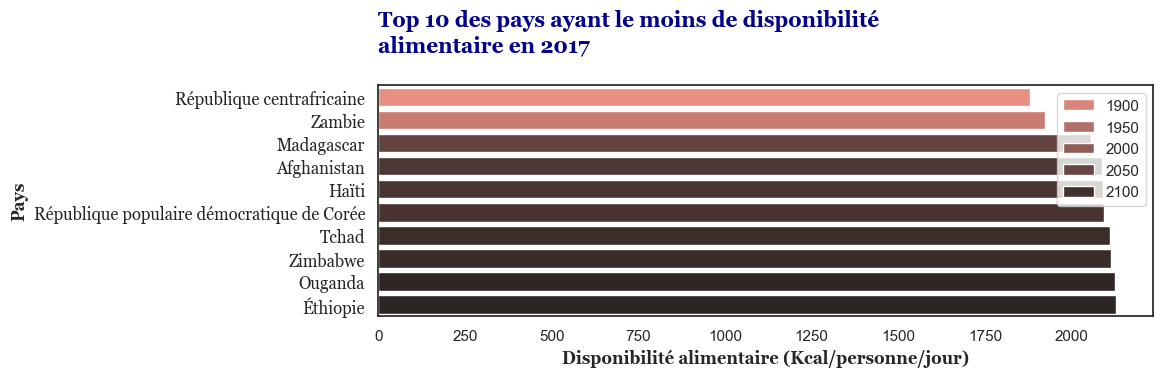

In [175]:
sns.set_style("white")
sns.set_context("notebook")

fig = plt.figure(figsize=(10,3), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
sns.barplot(data=data, y="Pays", x="Disponibilité alimentaire (Kcal/personne/jour)", hue="Disponibilité alimentaire (Kcal/personne/jour)")
ax.set_yticks(data["Pays"])
ax.set_yticklabels(data["Pays"], rotation=0, fontname="Georgia", size=12)
ax.set_xlabel("Disponibilité alimentaire (Kcal/personne/jour)", size = 12, fontname="Georgia", fontweight="bold")
ax.set_ylabel("Pays", size = 12, fontname="Georgia", fontweight="bold")
ax.set_title("Top 10 des pays ayant le plus de disponibilité\nalimentaire en 2017\n", 
             fontname="Georgia", fontweight="bold", size=15, color="darkblue", loc="left")
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,3), dpi=100, facecolor="w")
ax = fig.add_subplot(111)
sns.barplot(data=data2, y="Pays", x="Disponibilité alimentaire (Kcal/personne/jour)", hue="Disponibilité alimentaire (Kcal/personne/jour)", palette="dark:salmon_r")
ax.set_yticks(data2["Pays"])
ax.set_yticklabels(data2["Pays"], rotation=0, fontname="Georgia", size=12)
ax.set_xlabel("Disponibilité alimentaire (Kcal/personne/jour)", size = 12, fontname="Georgia", fontweight="bold")
ax.set_ylabel("Pays", size = 12, fontname="Georgia", fontweight="bold")
ax.set_title("Top 10 des pays ayant le moins de disponibilité\nalimentaire en 2017\n", 
             fontname="Georgia", fontweight="bold", size=15, color="darkblue", loc="left")

plt.legend()

plt.show()

<p><i>Le graphique met en évidence les dix pays disposant des niveaux les plus élevés de disponibilité alimentaire (graphique 1) et le Top 10 des pays avec le moins de disponibilité alimentaire (graphique 2) pour l'année 2017, mesurés en kilocalories disponibles par habitant et par jour.</i></p> 

<p><i>Sur le graphique 1, on constate une nette domination des pays comme l'Autriche, la Belgique, la Turquie et les Etats-Unis d'amérique qui se trouvent en tête du classement avec une moyenne dépassant 3500 Kcal/personne/jour.<br>

Une disponibilité aussi élevée peut potentiellement conduire à des problèmes de surconsommation, de gaspillage alimentaire ou de santé publique (obésité, maladies cardiovasculaires), soulignant que l’abondance alimentaire ne signifie pas nécessairement une alimentation équilibrée.</i></p>

<p><i>Sur le graphique 2, on trouve principalement des pays d'Afrique et d'Asie comme la République centrafricaine, la Zambie, Madagascar, Afghanistan, Haïti ..., avec des valeurs inférieur à 2100 Kcal/personne/jour, en dessous du seuil recommandé pour une alimentation adéquate.<br>

Cette situation peut entraîner des carences nutritionnelles graves, des taux de malnutrition élevés, et une forte vulnérabilité des populations face à toute crise (sanitaire, climatique ou géopolitique).</i></p>

<h7><a name="3.2.3.1"><span style="color:orange"><b>3.2.3.1- Analyse de la situation alimentaire de l'Autriche</b></span></a></h7>

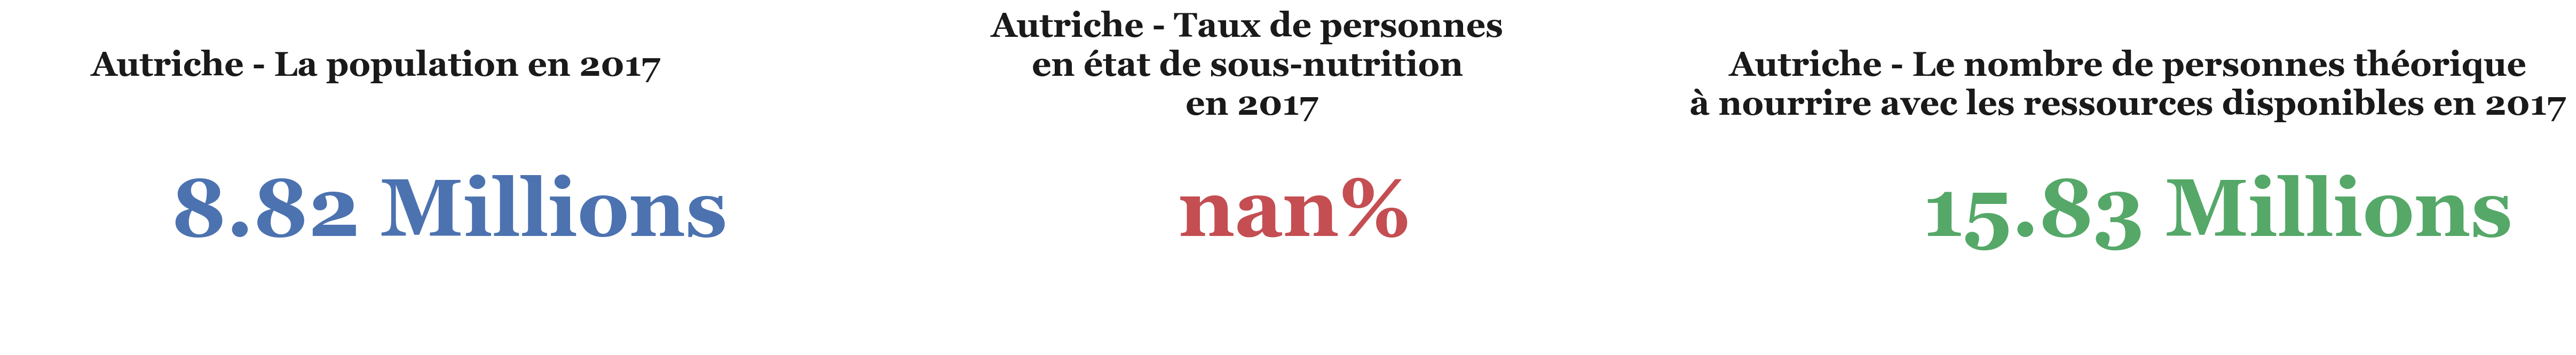

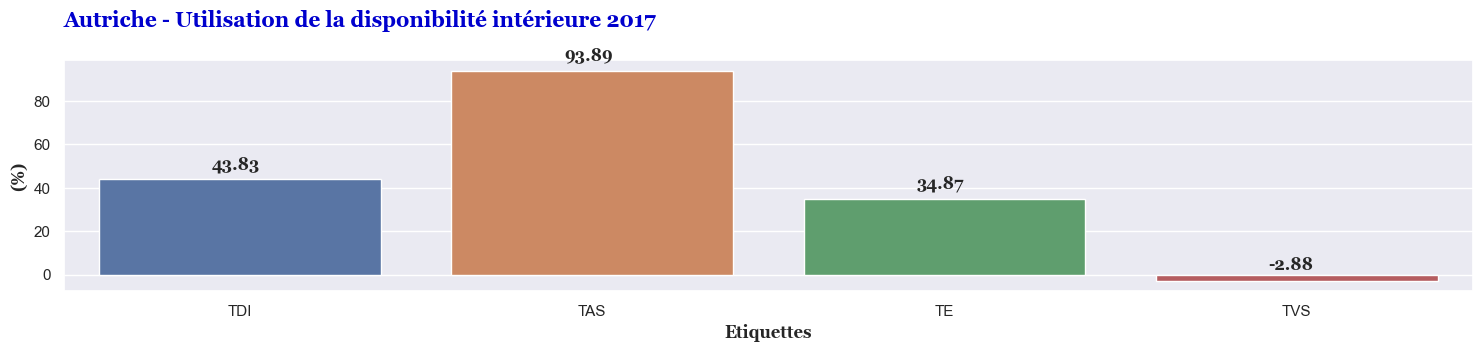

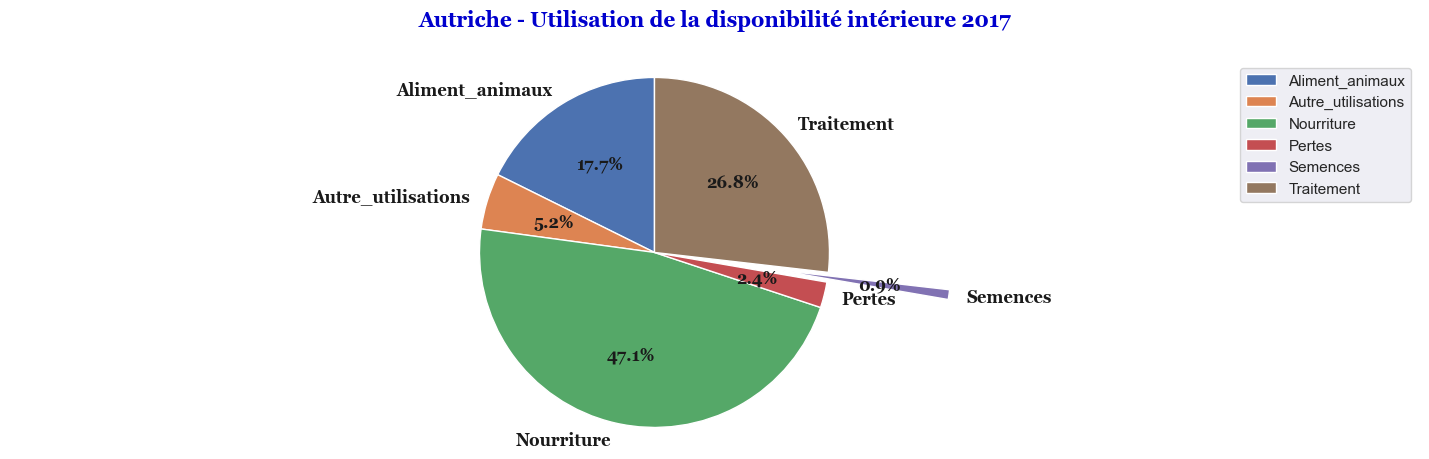

In [176]:
analyse_sous_nutrition_par_pays(pays="Autriche", facteur=1000000, unite="Millions", e_s=0.7, teta=90)


<p><i>En 2017, l’Autriche comptait 8,82 millions d’habitants, alors que ses ressources alimentaires théoriques permettaient de nourrir jusqu’à 15,83 millions de personnes, montrant un excédent alimentaire important.<br>

Le taux d'autosuffisance (TAS) de 94 % indique que l'Autriche produisait la quasi-totalité de ses besoins alimentaires, même si un taux de dépendance aux importations (TDI) de 43,83 % montre que les importations complétaient de manière significative l’offre nationale.<br>

Le taux d’exportation (TE) élevé de 35 % souligne que l’Autriche exportait une part importante de sa production, ce qui montre son intégration dans le commerce alimentaire international, mais peut aussi signifier que toute la production n'était pas mobilisée pour la consommation intérieure.<br>

Le taux de variation de stock (TVS) de -2,88 % traduit une légère diminution des réserves, sans situation critique mais montrant un certain équilibre fragile entre production, exportations et consommation.<br>

Enfin, seulement 47 % de la disponibilité alimentaire était utilisée pour l'alimentation humaine, selon le graphique 3, ce qui limite l’effet positif de l’excédent théorique.<br>

Ainsi, malgré une bonne capacité de production, la forte part des exportations, la dépendance relative aux importations et la faible part dédiée directement à la nourriture peuvent expliquer certaines fragilités alimentaires internes.</i></p>

<h7><a name="3.2.3.2"><span style="color:orange"><b>3.2.3.2- Analyse de la situation alimentaire de la Belgique</b></span></a></h7>

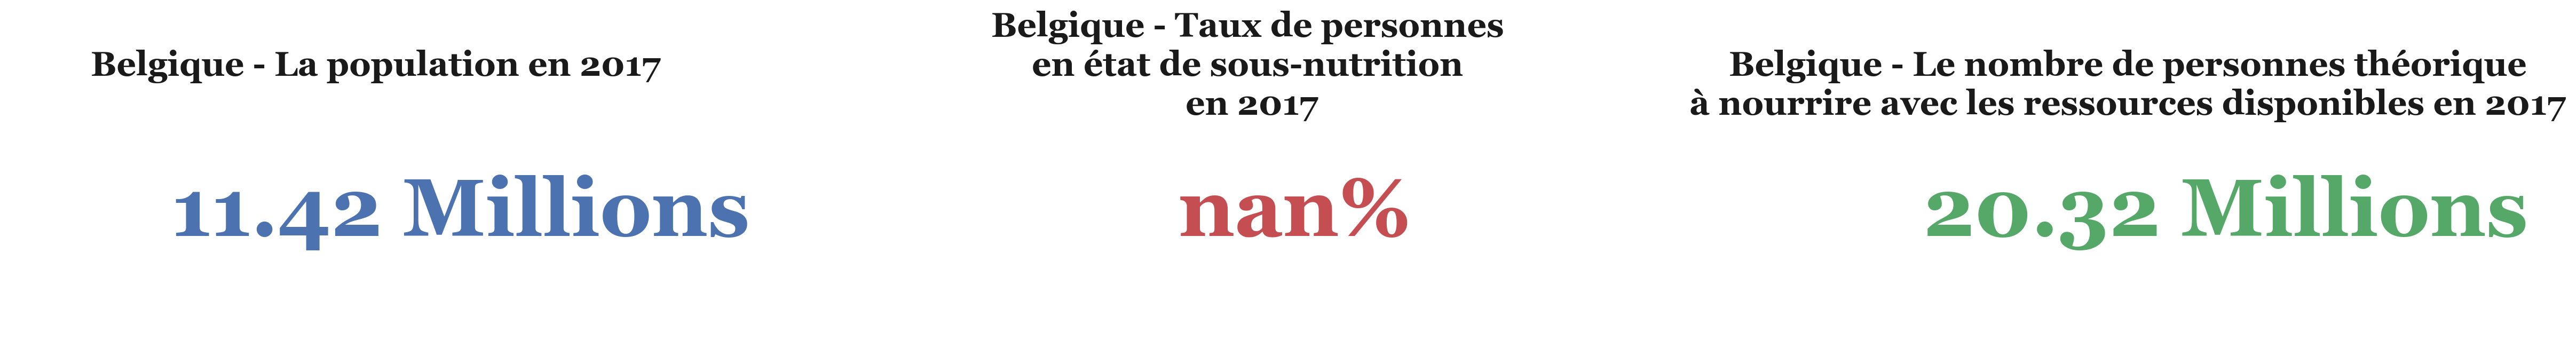

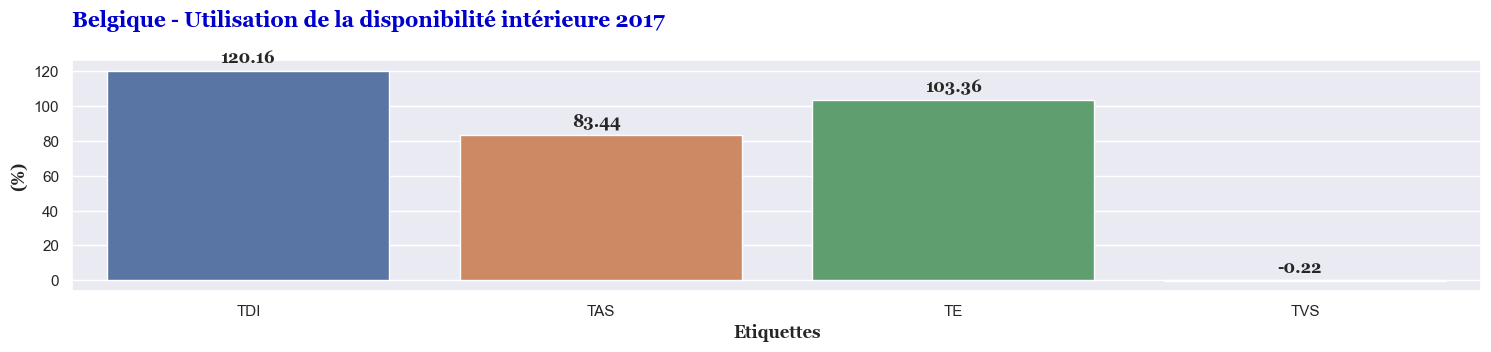

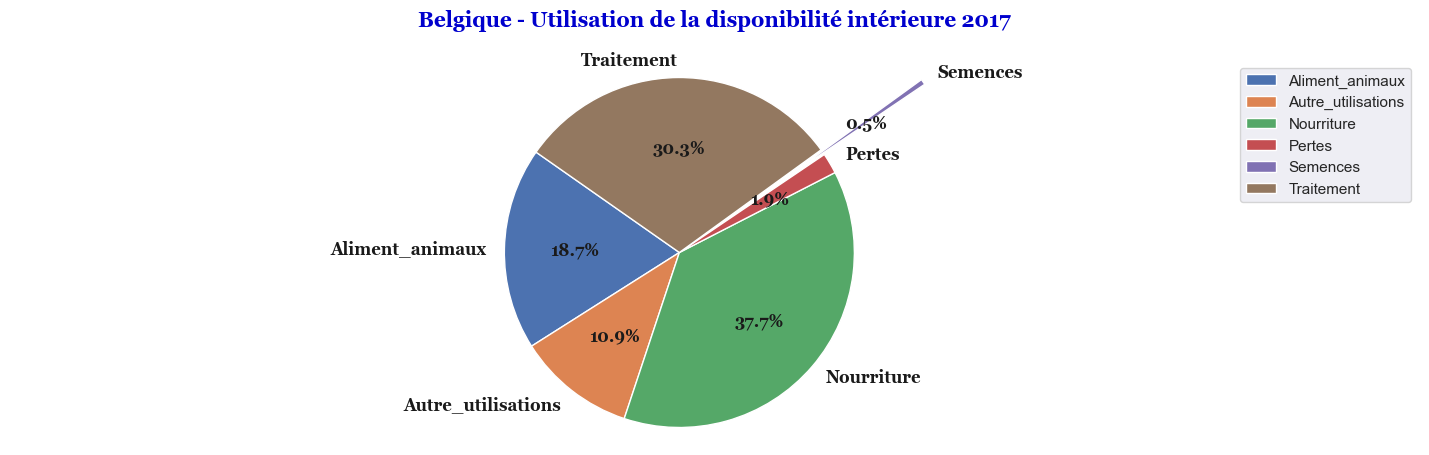

In [177]:
analyse_sous_nutrition_par_pays(pays="Belgique", facteur=1000000, unite="Millions", e_s=0.7, teta=145)

<p><i>En 2017, la Belgique comptait 11,42 millions d’habitants, alors que les ressources alimentaires disponibles auraient théoriquement permis de nourrir 20,32 millions de personnes, montrant un fort excédent alimentaire.<br>

Le taux d’autosuffisance (TAS) de 83 % indique que la Belgique produisait une part importante de ses besoins, mais devait quand même compter sur un recours important aux importations, comme le montre un taux de dépendance aux importations (TDI) de 120 %. Cela signifie que le pays importait bien plus que ce qui était nécessaire pour couvrir ses propres besoins.<br>

À l’inverse, un taux d’exportation (TE) de 103 % révèle que la Belgique exportait autant, voire plus, qu’elle ne consommait localement, montrant un rôle très fort du pays comme acteur du commerce alimentaire international.<br>

Le taux de variation de stock (TVS) de -0,22 % montre une stabilité des stocks, sans signe de crise particulière ni d'accumulation excessive.<br>

Enfin, seulement 38 % de la disponibilité alimentaire était réellement utilisée pour l’alimentation humaine d'après le graphique 3. Une grande part des ressources est donc destinée à d’autres usages (transformation industrielle, alimentation animale, pertes, etc.).<br>

Ainsi, malgré un excédent alimentaire théorique important, la Belgique est très insérée dans les échanges internationaux, ce qui explique à la fois sa forte dépendance aux importations et ses exportations massives. La faible part de nourriture effectivement dédiée à l’alimentation humaine pourrait aussi influencer certaines vulnérabilités.</i></p>

<h3><a name="4"><span style="color:pink"><b>4- Analyse de certains produits</b></span></a></h3>

<p>Certains aliments sont des piliers de la sécurité alimentaire dans certaines régions du monde. Identifier les produits qui couvrent la majorité des besoins caloriques permet de mieux comprendre les vulnérabilités des populations en cas de perturbation de leur disponibilité</p>

In [178]:
df_nrj_necessaire.head()
# df_nrj_necessaire.loc[df_nrj_necessaire["Produit"].str.contains("Blé"), :]

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,145184452.0


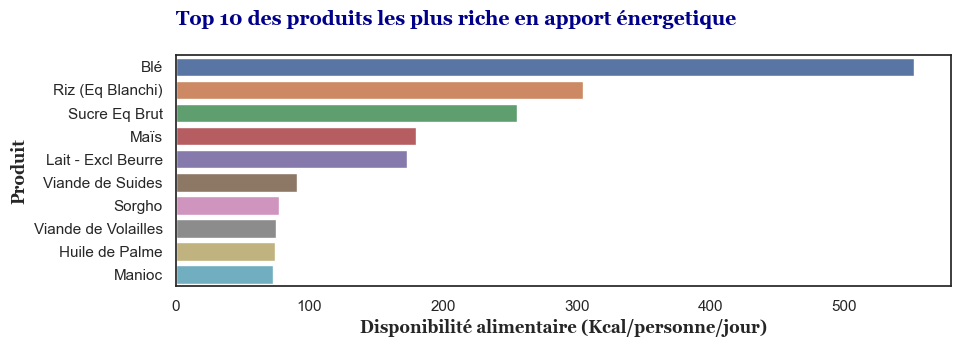

In [179]:
df_produit = df_nrj_necessaire[["Produit", "Disponibilité alimentaire (Kcal/personne/jour)"]].\
groupby(by="Produit").mean().sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10)
    
font1 = {"size":14, "fontname":"Georgia", "fontweight":"bold", "color":"darkblue"}
font2 = {"size":12, "fontname":"Georgia", "fontweight":"bold"}

sns.set_style("white")
fig = plt.figure(figsize=(10, 3), facecolor="w", dpi=100)
sns.barplot(data=df_produit, y="Produit", x="Disponibilité alimentaire (Kcal/personne/jour)", hue="Produit")

plt.xlabel(xlabel="Disponibilité alimentaire (Kcal/personne/jour)", fontdict=font2)
plt.ylabel(ylabel="Produit", fontdict=font2)
plt.title("Top 10 des produits les plus riche en apport énergetique\n", fontdict=font1, loc="left")
plt.show()

<p><i>Commentaire ...</i></p>

<h4><a name="4.1"><span style="color:lightblue"><b>4.1- Etude sur les céréales</b></span></a></h4>

<p>Les céréales sont des plantes de la famille des graminées cultivées principalement pour leurs graines, qui sont riches en glucides. Elles constituent une base alimentaire essentielle dans de nombreuses cultures à traverse le monde.<br>

Parmi les céréales les plus connues, on retrouve : Le blé, le riz, le maïs, l'orge, le seigle, l'avoine, le millet, le sorgho ... <br>

Le graine de céréales peuvent être consommées entières, transformées en farine, ou encore utilisées dans des produits comme le pain, les pates, ou les céréales du petit dejeuner. Elles apportent de l'énérgie, des fibres, des vitamines (notamment du groupe B), et des minéraux. <br>

Nous allons voir comment sont gérés les céréales dans le monde et dans l'un des pays les plus grand producteur de céréale en Afrique.</p>

In [180]:
df_nrj_necessaire.head()

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,36296113.0,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,145184452.0


In [181]:
# df_nrj_necessaire[["Pays", "Produit", "Disponibilité alimentaire (Kcal/personne/jour)"]].groupby(by=["Pays", "Produit"]).sum().\
#     sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(50)